In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import linearmodels as lm
import matplotlib
import math
import statsmodels.formula.api as smf
import statsmodels.api as sm

from linearmodels.panel import PanelOLS
from linearmodels.panel import RandomEffects
from linearmodels.panel import FirstDifferenceOLS
from linearmodels.panel import compare
from matplotlib import pyplot as plt

from pandas.api.types import is_numeric_dtype


pd.set_option('display.max_columns', 500)

%matplotlib inline

In [2]:
df=pd.read_csv('final_estimation_file_apta_added_greg.csv',
                    encoding='utf-8')
df.drop(columns=['Unnamed: 0'],inplace=True)

In [3]:
tsd_data=pd.read_csv('tsd_pop_employment.csv',
                    encoding='utf-8')
tsd_data.drop(columns=['Unnamed: 0','CBSA Title'],inplace=True)
tsd_data.head()

,CBSA Code,STATE,Year,TOTAL_JOBS_WA_TRACTS,JOBS_LESS_THAN_1250_WA_TRACTS,JOBS_1250_3333_WA_TRACTS,JOBS_MORE_THAN_3333_WA_TRACTS,JOBS_WHITE_ALONE_WA_TRACTS,JOBS_BLACK_ALONE_WA_TRACTS,JOBS_HISPANIC_LATINO_WA_TRACTS,JOBS_LESS_THAN_40K_WA_TRACTS,JOBS_NON_WHITE_WA_TRACTS,JOBS_UPTO_HIGH_SCHOOL_WA_TRACTS,JOBS_COLLEGE_OR_HIGHER_WA_TRACTS,TOTAL_JOBS_WA_TSD_TRACTS,JOBS_LESS_THAN_1250_WA_TSD_TRACTS,JOBS_1250_3333_WA_TSD_TRACTS,JOBS_MORE_THAN_3333_WA_TSD_TRACTS,JOBS_WHITE_ALONE_WA_TSD_TRACTS,JOBS_BLACK_ALONE_WA_TSD_TRACTS,JOBS_HISPANIC_LATINO_WA_TSD_TRACTS,JOBS_LESS_THAN_40K_WA_TSD_TRACTS,JOBS_NON_WHITE_WA_TSD_TRACTS,JOBS_UPTO_HIGH_SCHHOL_WA_TSD_TRACTS,JOBS_COLLEGE_OR_HIGHER_WA_TSD_TRACTS,TOTAL_JOBS_RA_TRACTS,TOTAL_JOBS_WHITE_ALONE_RA_TRACTS,TOTAL_JOBS_BLACK_ALONE_RA_TRACTS,TOTAL_JOBS_HISPANIC_LATINO_RA_TRACTS,TOTAL_JOBS_UNDER_1250_RA_TRACTS,TOTAL_JOBS_BETN_1250_3333_RA_TRACTS,TOTAL_JOBS_OVER_3333_RA_TRACTS,TOTAL_JOBS_UNDER_3333_RA_TRACTS,TOTAL_JOBS_NON_WHITE_RA_TRACTS,TOTAL_JOBS_UPTO_HIGH_SCHHOL_RA_TRACTS,TOTAL_JOBS_COLLEGE_OR_HIGHER_RA_TRACTS,AREA_ACRE,TOTAL_JOBS_RA_TSD_TRACTS,TOTAL_JOBS_WHITE_ALONE_RA_TSD_TRACTS,TOTAL_JOBS_BLACK_ALONE_RA_TSD_TRACTS,TOTAL_JOBS_HISPANIC_LATINO_RA_TSD_TRACTS,TOTAL_JOBS_UNDER_1250_RA_TSD_TRACTS,TOTAL_JOBS_BETN_1250_3333_RA_TSD_TRACTS,TOTAL_JOBS_OVER_3333_RA_TSD_TRACTS,TOTAL_JOBS_UNDER_3333_RA_TSD_TRACTS,TOTAL_JOBS_NON_WHITE_RA_TSD_TRACTS,TOTAL_JOBS_UPTO_HIGH_SCHHOL_RA_TSD_TRACTS,TOTAL_JOBS_COLLEGE_OR_HIGHER_RA_TSD_TRACTS
0,10180,Texas,2002,57166.0,22735.0,25452.0,8979.0,0.0,0.0,0.0,48187.0,57166.0,0.0,0.0,9489.0,4531.0,3582.0,1376.0,0.0,0.0,0.0,8113.0,9489.0,0.0,0.0,58397.0,0.0,0.0,0.0,23086.0,25800.0,9511.0,48886.0,58397.0,0.0,0.0,1216.0,2355.0,0.0,0.0,0.0,954.0,1065.0,336.0,2019.0,2355.0,0.0,0.0
1,10180,Texas,2003,56917.0,21970.0,25046.0,9901.0,0.0,0.0,0.0,47016.0,56917.0,0.0,0.0,9484.0,4402.0,3471.0,1611.0,0.0,0.0,0.0,7873.0,9484.0,0.0,0.0,57221.0,0.0,0.0,0.0,22049.0,25074.0,10098.0,47123.0,57221.0,0.0,0.0,1216.0,2462.0,0.0,0.0,0.0,1032.0,1069.0,361.0,2101.0,2462.0,0.0,0.0
2,10180,Texas,2004,59025.0,22123.0,26375.0,10527.0,0.0,0.0,0.0,48498.0,59025.0,0.0,0.0,9599.0,4443.0,3594.0,1562.0,0.0,0.0,0.0,8037.0,9599.0,0.0,0.0,61419.0,0.0,0.0,0.0,23062.0,27199.0,11158.0,50261.0,61419.0,0.0,0.0,1216.0,2970.0,0.0,0.0,0.0,1231.0,1315.0,424.0,2546.0,2970.0,0.0,0.0
3,10180,Texas,2005,57879.0,21202.0,25353.0,11324.0,0.0,0.0,0.0,46555.0,57879.0,0.0,0.0,9645.0,4539.0,3500.0,1606.0,0.0,0.0,0.0,8039.0,9645.0,0.0,0.0,60001.0,0.0,0.0,0.0,21854.0,26081.0,12066.0,47935.0,60001.0,0.0,0.0,1216.0,2938.0,0.0,0.0,0.0,1134.0,1326.0,478.0,2460.0,2938.0,0.0,0.0
4,10180,Texas,2006,59588.0,21170.0,25759.0,12659.0,0.0,0.0,0.0,46929.0,59588.0,0.0,0.0,9819.0,4475.0,3516.0,1828.0,0.0,0.0,0.0,7991.0,9819.0,0.0,0.0,62311.0,0.0,0.0,0.0,22008.0,26639.0,13664.0,48647.0,62311.0,0.0,0.0,1216.0,2983.0,0.0,0.0,0.0,1122.0,1342.0,519.0,2464.0,2983.0,0.0,0.0


In [4]:
df=pd.merge(df,tsd_data,left_on=['CBSA','Year'],right_on=['CBSA Code','Year'],how='left')
df=df.drop_duplicates()
df.head()

,CBSA,MNAME,Mode,Year,UPT_ADJUSTED,VRM_ADJUSTED,FARE_ADJUSTED,FARE_per_UPT_cleaned,min_year,max_year,FARE_per_UPT,PROBLEM_FLAG,NOTE,PROBLEM_FLAG2,PROBLEM_FLAG3,Tot_Pop,Tot_Instate_Pop,Tot_Outstate_Pop,Tot_NonUSA_POP,Total_Median_Income_Individual,Native_Instate_Med_Inc_Indiv,Native_Outstate_Med_Inc_Indiv,Native_Outcountry_Med_Inc_Indiv,Total_Pop_Poverty,Pop_Below100_Poverty,Pop_Below150_Poverty,Pop_Above150_Poverty,Age_under18,Age_18to64,Age_over64,Total_HH,HH_0Veh,HH_1Veh,HH_2Veh,HH_3Veh,HH_4+Veh,PCT_HH_NO_VEH,HH_MED_INC,HH_MEAN_INC,INC_U35,INC_35_100,INC_100P,TOT_UNEMP_MSA,TOT_EMP_MSA,TOT_LABOR_MSA,UNEMP_RATE_PCT,EMP_RATE_PCT,GasPrice,Area_acre,POP_CENSUSTRACT,AVG_SPEED,2018_Dollar_Multiplier,TNC_ARRIVAL,Link_x,TNC_FLAG,YEARS_SINCE_TNC,FARE_ADJ_2018,TOTAL_MED_INC_INDIV_2018,NATIVE_INSTATE_MED_INC_2018,NATIVE_OUTSTATE_MED_INC_2018,HH_MED_INC_2018,HH_MEAN_INC_2018,GAS_PRICE_2018,dockCt,docklessCt,scooterCt,PBS_Start,PBS_End,PBS_Flag,Link,walkscore,transit,bike,CLUSTER_GT_NEW_11,CLUSTER_GT_ORIGINAL,CLUSTER_GT_8_GROUPS,CLUSTER_APTA,CLUSTER_NOTE,TOTAL_EMPLOYMENT,JTW_DA_PCT,JTW_CARPOOLED_PCT,JTW_TRANSIT_PCT,JTW_WALK_PCT,JTW_BICYCLE_PCT,JTW_OTHER_PCT,JTW_HOME_PCT,NOTE_JTW,AVG_FARE_2018,WEIGHTED_POP_DENSITY,_merge,CLUSTER_APTA_EXTENDED,CBSA Code,STATE,TOTAL_JOBS_WA_TRACTS,JOBS_LESS_THAN_1250_WA_TRACTS,JOBS_1250_3333_WA_TRACTS,JOBS_MORE_THAN_3333_WA_TRACTS,JOBS_WHITE_ALONE_WA_TRACTS,JOBS_BLACK_ALONE_WA_TRACTS,JOBS_HISPANIC_LATINO_WA_TRACTS,JOBS_LESS_THAN_40K_WA_TRACTS,JOBS_NON_WHITE_WA_TRACTS,JOBS_UPTO_HIGH_SCHOOL_WA_TRACTS,JOBS_COLLEGE_OR_HIGHER_WA_TRACTS,TOTAL_JOBS_WA_TSD_TRACTS,JOBS_LESS_THAN_1250_WA_TSD_TRACTS,JOBS_1250_3333_WA_TSD_TRACTS,JOBS_MORE_THAN_3333_WA_TSD_TRACTS,JOBS_WHITE_ALONE_WA_TSD_TRACTS,JOBS_BLACK_ALONE_WA_TSD_TRACTS,JOBS_HISPANIC_LATINO_WA_TSD_TRACTS,JOBS_LESS_THAN_40K_WA_TSD_TRACTS,JOBS_NON_WHITE_WA_TSD_TRACTS,JOBS_UPTO_HIGH_SCHHOL_WA_TSD_TRACTS,JOBS_COLLEGE_OR_HIGHER_WA_TSD_TRACTS,TOTAL_JOBS_RA_TRACTS,TOTAL_JOBS_WHITE_ALONE_RA_TRACTS,TOTAL_JOBS_BLACK_ALONE_RA_TRACTS,TOTAL_JOBS_HISPANIC_LATINO_RA_TRACTS,TOTAL_JOBS_UNDER_1250_RA_TRACTS,TOTAL_JOBS_BETN_1250_3333_RA_TRACTS,TOTAL_JOBS_OVER_3333_RA_TRACTS,TOTAL_JOBS_UNDER_3333_RA_TRACTS,TOTAL_JOBS_NON_WHITE_RA_TRACTS,TOTAL_JOBS_UPTO_HIGH_SCHHOL_RA_TRACTS,TOTAL_JOBS_COLLEGE_OR_HIGHER_RA_TRACTS,AREA_ACRE,TOTAL_JOBS_RA_TSD_TRACTS,TOTAL_JOBS_WHITE_ALONE_RA_TSD_TRACTS,TOTAL_JOBS_BLACK_ALONE_RA_TSD_TRACTS,TOTAL_JOBS_HISPANIC_LATINO_RA_TSD_TRACTS,TOTAL_JOBS_UNDER_1250_RA_TSD_TRACTS,TOTAL_JOBS_BETN_1250_3333_RA_TSD_TRACTS,TOTAL_JOBS_OVER_3333_RA_TSD_TRACTS,TOTAL_JOBS_UNDER_3333_RA_TSD_TRACTS,TOTAL_JOBS_NON_WHITE_RA_TSD_TRACTS,TOTAL_JOBS_UPTO_HIGH_SCHHOL_RA_TSD_TRACTS,TOTAL_JOBS_COLLEGE_OR_HIGHER_RA_TSD_TRACTS
0,10420,"Akron, OH Metro Area",Bus,2002,5226386,4026372,596583,0.114148,2002,2018,0.114148,NaN,Bad fare,NaN,1.0,646583.7344,496141.0469,137193.6719,-389.53125,25405.20313,26028.32813,26651.07813,7117.03125,682354.11,7.55,8.94,83.85,24.64,62.9,12.46,265452.20,22830.14,58254.52,117083.25,46891.53,20392.77,8.60,43046.82813,55300.5625,39.49,46.56,13.95,21948.42,346147.17,368095.58,5.96,94.04,1.36,NaN,119786.0,14.88,1.40,2014,http://www.crainscleveland.com/article/2014082...,0,0,4004892.28,35567.28438,36439.65938,37311.50938,60265.55938,77420.7875,1.9040,0,0,0,NaN,NaN,0.0,NaN,0,0,0,1,1,H,24,NaN,309488.2031,87.4,6.2,0.8,1.7,0.1,0.7,3.1,Goes to negative when extrapolating. Possible ...,0.159808,2417.239652,both,24,10420.0,Ohio,314749.0,96006.0,131687.0,87056.0,0.0,0.0,0.0,227693.0,314749.0,0.0,0.0,81463.0,23319.0,33326.0,24818.0,0.0,0.0,0.0,56645.0,81463.0,0.0,0.0,305401.0,0.0,0.0,0.0,92556.0,127165.0,85680.0,219721.0,305401.0,0.0,0.0,13619.2,54517.0,0.0,0.0,0.0,18228.0,25397.0,10892.0,43625.0,54517.0,0.0,0.0
1,10420,"Akron, OH Metro Area",Bus,2003,5395902,3976569,2318587,0.429694,2002,2018,0.429694,NaN,NaN,NaN,NaN,659397.0625,504631.8125,137582.3125,753.12500,25120.18750,25632.68750,25995.68750,10350.875,682850.56,8.81,8.66,82.79,24.33,63.0,12.68,269144.19,22073.44,67400.94,1

In [5]:
# WAC data derived columns. To account for people coming into the TSD from outlying areas.
df['TSD_WA_EMP_PCT_LEHD']=100*df['TOTAL_JOBS_WA_TSD_TRACTS']/df['TOTAL_JOBS_WA_TRACTS']
df['TSD_WA_EMP_PCT_CBSA']=100*df['TOTAL_JOBS_WA_TSD_TRACTS']/df['TOT_EMP_MSA']

df['JOBS_LESS_THAN_3333_WA_TRACTS']=df['JOBS_LESS_THAN_1250_WA_TRACTS']+df['JOBS_1250_3333_WA_TRACTS']
df['JOBS_LESS_THAN_3333_WA_TSD_TRACTS']=df['JOBS_LESS_THAN_1250_WA_TSD_TRACTS']+df['JOBS_1250_3333_WA_TSD_TRACTS']

df['TSD_WA_EMP_WAGE_UNDER_1250']=100*df['JOBS_LESS_THAN_1250_WA_TSD_TRACTS']/df['TOTAL_JOBS_WA_TRACTS']
df['TSD_WA_EMP_WAGE_BETN_1250_3333']=100*df['JOBS_1250_3333_WA_TSD_TRACTS']/df['TOTAL_JOBS_WA_TRACTS']
df['TSD_WA_EMP_WAGE_UNDER_3333']=100*df['JOBS_LESS_THAN_3333_WA_TSD_TRACTS']/df['TOTAL_JOBS_WA_TRACTS']

df['TSD_WA_EMP_WAGE_UNDER_1250_PCT_WA']=100*df['JOBS_LESS_THAN_1250_WA_TSD_TRACTS']/df['JOBS_LESS_THAN_1250_WA_TRACTS']
df['TSD_WA_EMP_WAGE_BETN_1250_3333_PCT_WA']=100*df['JOBS_1250_3333_WA_TSD_TRACTS']/df['JOBS_1250_3333_WA_TRACTS']
df['TSD_WA_EMP_WAGE_UNDER_3333_PCT_WA']=100*df['JOBS_LESS_THAN_3333_WA_TSD_TRACTS']/df['JOBS_LESS_THAN_3333_WA_TRACTS']

df['TSD_WA_EMP_WAGE_UNDER_1250_PCT_TSD']=100*df['JOBS_LESS_THAN_1250_WA_TSD_TRACTS']/df['TOTAL_JOBS_WA_TSD_TRACTS']
df['TSD_WA_EMP_WAGE_BETN_1250_3333_PCT_TSD']=100*df['JOBS_1250_3333_WA_TSD_TRACTS']/df['TOTAL_JOBS_WA_TSD_TRACTS']
df['TSD_WA_EMP_WAGE_UNDER_3333_PCT_TSD']=100*df['JOBS_LESS_THAN_3333_WA_TSD_TRACTS']/df['TOTAL_JOBS_WA_TSD_TRACTS']

#RAC data derived columns.

df['TSD_POP_PCT_LEHD']=100*df['TOTAL_JOBS_RA_TSD_TRACTS']/df['TOTAL_JOBS_RA_TRACTS'] #RAC data
df['TSD_POP_PCT_CBSA']=100*df['TOTAL_JOBS_RA_TSD_TRACTS']/df['Tot_Pop']
df['TSD_POP_WAGE_UNDER_1250']=100*df['TOTAL_JOBS_UNDER_1250_RA_TSD_TRACTS']/df['TOTAL_JOBS_RA_TRACTS']
df['TSD_POP_WAGE_BETN_1250_3333']=100*df['TOTAL_JOBS_BETN_1250_3333_RA_TSD_TRACTS']/df['TOTAL_JOBS_RA_TRACTS']
df['TSD_POP_WAGE_UNDER_3333']=100*df['TOTAL_JOBS_UNDER_3333_RA_TSD_TRACTS']/df['TOTAL_JOBS_RA_TRACTS']

df['TSD_POP_WAGE_UNDER_1250_PCT_RA']=100*df['TOTAL_JOBS_UNDER_1250_RA_TSD_TRACTS']/df['TOTAL_JOBS_UNDER_1250_RA_TRACTS']
df['TSD_POP_WAGE_BETN_1250_3333_PCT_RA']=100*df['TOTAL_JOBS_BETN_1250_3333_RA_TSD_TRACTS']/df['TOTAL_JOBS_BETN_1250_3333_RA_TRACTS']
df['TSD_POP_WAGE_UNDER_3333_PCT_RA']=100*df['TOTAL_JOBS_UNDER_3333_RA_TSD_TRACTS']/df['TOTAL_JOBS_UNDER_3333_RA_TRACTS']

df['TSD_POP_WAGE_UNDER_1250_PCT_TSD']=100*df['TOTAL_JOBS_UNDER_1250_RA_TSD_TRACTS']/df['TOTAL_JOBS_RA_TSD_TRACTS']
df['TSD_POP_WAGE_BETN_1250_3333_PCT_TSD']=100*df['TOTAL_JOBS_BETN_1250_3333_RA_TSD_TRACTS']/df['TOTAL_JOBS_RA_TSD_TRACTS']
df['TSD_POP_WAGE_UNDER_3333_PCT_TSD']=100*df['TOTAL_JOBS_UNDER_3333_RA_TSD_TRACTS']/df['TOTAL_JOBS_RA_TSD_TRACTS']


In [6]:
# read updated TNC revenue data
# tnc_rev=pd.read_csv('TNC_REVENUE_3.csv')
# tnc_rev.drop(columns=['Unnamed: 0'],inplace=True)
# tnc_rev=tnc_rev.drop_duplicates(['CBSA','MNAME','Year'])
# tnc_rev.head()

tnc_rev=pd.read_csv('TNC_CBSA_FINAL_2.csv')

tnc_rev.drop(columns=['MNAME','Tot_Pop'],inplace=True)
# tnc_rev=tnc_rev.drop_duplicates(['CBSA','MNAME','Year'])
tnc_rev.head()

,CBSA,Year,TNC_CLUSTER,TOT_POP_CLUSTER,TOTAL_YEARLY_POPULATION,POP_SHARE,TOTAL_TRIPS_PER_CAPITA,TNC_TRIPS_SCALED,TOTAL_TNC_TRIPS_PER_CLUSTER,TRIPS_SCALED,Scale_2,TNC_TRIPS,TNC_TRIPS_PER_CAPITA_CLUSTER
0,10420,2014,21,20063673.0,119360751,0.035997,4.034635,0.9718,80.9496,19.497887,0.514568,10.0,0.5
1,10740,2014,21,20063673.0,119360751,0.035997,4.034635,0.9718,80.9496,19.497887,0.514568,10.0,0.5
2,10900,2014,21,20063673.0,119360751,0.035997,4.034635,0.9718,80.9496,19.497887,0.514568,10.0,0.5
3,11460,2014,21,20063673.0,119360751,0.035997,4.034635,0.9718,80.9496,19.497887,0.514568,10.0,0.5
4,12420,2014,21,20063673.0,119360751,0.035997,4.034635,0.9718,80.9496,19.497887,0.514568,10.0,0.5


In [7]:
df=pd.merge(df,tnc_rev,on=['CBSA','Year'],how='left')
df['TNC_TRIPS_PER_CAPITA_CLUSTER']=df['TNC_TRIPS_PER_CAPITA_CLUSTER'].fillna(0)
df.head()

,CBSA,MNAME,Mode,Year,UPT_ADJUSTED,VRM_ADJUSTED,FARE_ADJUSTED,FARE_per_UPT_cleaned,min_year,max_year,FARE_per_UPT,PROBLEM_FLAG,NOTE,PROBLEM_FLAG2,PROBLEM_FLAG3,Tot_Pop,Tot_Instate_Pop,Tot_Outstate_Pop,Tot_NonUSA_POP,Total_Median_Income_Individual,Native_Instate_Med_Inc_Indiv,Native_Outstate_Med_Inc_Indiv,Native_Outcountry_Med_Inc_Indiv,Total_Pop_Poverty,Pop_Below100_Poverty,Pop_Below150_Poverty,Pop_Above150_Poverty,Age_under18,Age_18to64,Age_over64,Total_HH,HH_0Veh,HH_1Veh,HH_2Veh,HH_3Veh,HH_4+Veh,PCT_HH_NO_VEH,HH_MED_INC,HH_MEAN_INC,INC_U35,INC_35_100,INC_100P,TOT_UNEMP_MSA,TOT_EMP_MSA,TOT_LABOR_MSA,UNEMP_RATE_PCT,EMP_RATE_PCT,GasPrice,Area_acre,POP_CENSUSTRACT,AVG_SPEED,2018_Dollar_Multiplier,TNC_ARRIVAL,Link_x,TNC_FLAG,YEARS_SINCE_TNC,FARE_ADJ_2018,TOTAL_MED_INC_INDIV_2018,NATIVE_INSTATE_MED_INC_2018,NATIVE_OUTSTATE_MED_INC_2018,HH_MED_INC_2018,HH_MEAN_INC_2018,GAS_PRICE_2018,dockCt,docklessCt,scooterCt,PBS_Start,PBS_End,PBS_Flag,Link,walkscore,transit,bike,CLUSTER_GT_NEW_11,CLUSTER_GT_ORIGINAL,CLUSTER_GT_8_GROUPS,CLUSTER_APTA,CLUSTER_NOTE,TOTAL_EMPLOYMENT,JTW_DA_PCT,JTW_CARPOOLED_PCT,JTW_TRANSIT_PCT,JTW_WALK_PCT,JTW_BICYCLE_PCT,JTW_OTHER_PCT,JTW_HOME_PCT,NOTE_JTW,AVG_FARE_2018,WEIGHTED_POP_DENSITY,_merge,CLUSTER_APTA_EXTENDED,CBSA Code,STATE,TOTAL_JOBS_WA_TRACTS,JOBS_LESS_THAN_1250_WA_TRACTS,JOBS_1250_3333_WA_TRACTS,JOBS_MORE_THAN_3333_WA_TRACTS,JOBS_WHITE_ALONE_WA_TRACTS,JOBS_BLACK_ALONE_WA_TRACTS,JOBS_HISPANIC_LATINO_WA_TRACTS,JOBS_LESS_THAN_40K_WA_TRACTS,JOBS_NON_WHITE_WA_TRACTS,JOBS_UPTO_HIGH_SCHOOL_WA_TRACTS,JOBS_COLLEGE_OR_HIGHER_WA_TRACTS,TOTAL_JOBS_WA_TSD_TRACTS,JOBS_LESS_THAN_1250_WA_TSD_TRACTS,JOBS_1250_3333_WA_TSD_TRACTS,JOBS_MORE_THAN_3333_WA_TSD_TRACTS,JOBS_WHITE_ALONE_WA_TSD_TRACTS,JOBS_BLACK_ALONE_WA_TSD_TRACTS,JOBS_HISPANIC_LATINO_WA_TSD_TRACTS,JOBS_LESS_THAN_40K_WA_TSD_TRACTS,JOBS_NON_WHITE_WA_TSD_TRACTS,JOBS_UPTO_HIGH_SCHHOL_WA_TSD_TRACTS,JOBS_COLLEGE_OR_HIGHER_WA_TSD_TRACTS,TOTAL_JOBS_RA_TRACTS,TOTAL_JOBS_WHITE_ALONE_RA_TRACTS,TOTAL_JOBS_BLACK_ALONE_RA_TRACTS,TOTAL_JOBS_HISPANIC_LATINO_RA_TRACTS,TOTAL_JOBS_UNDER_1250_RA_TRACTS,TOTAL_JOBS_BETN_1250_3333_RA_TRACTS,TOTAL_JOBS_OVER_3333_RA_TRACTS,TOTAL_JOBS_UNDER_3333_RA_TRACTS,TOTAL_JOBS_NON_WHITE_RA_TRACTS,TOTAL_JOBS_UPTO_HIGH_SCHHOL_RA_TRACTS,TOTAL_JOBS_COLLEGE_OR_HIGHER_RA_TRACTS,AREA_ACRE,TOTAL_JOBS_RA_TSD_TRACTS,TOTAL_JOBS_WHITE_ALONE_RA_TSD_TRACTS,TOTAL_JOBS_BLACK_ALONE_RA_TSD_TRACTS,TOTAL_JOBS_HISPANIC_LATINO_RA_TSD_TRACTS,TOTAL_JOBS_UNDER_1250_RA_TSD_TRACTS,TOTAL_JOBS_BETN_1250_3333_RA_TSD_TRACTS,TOTAL_JOBS_OVER_3333_RA_TSD_TRACTS,TOTAL_JOBS_UNDER_3333_RA_TSD_TRACTS,TOTAL_JOBS_NON_WHITE_RA_TSD_TRACTS,TOTAL_JOBS_UPTO_HIGH_SCHHOL_RA_TSD_TRACTS,TOTAL_JOBS_COLLEGE_OR_HIGHER_RA_TSD_TRACTS,TSD_WA_EMP_PCT_LEHD,TSD_WA_EMP_PCT_CBSA,JOBS_LESS_THAN_3333_WA_TRACTS,JOBS_LESS_THAN_3333_WA_TSD_TRACTS,TSD_WA_EMP_WAGE_UNDER_1250,TSD_WA_EMP_WAGE_BETN_1250_3333,TSD_WA_EMP_WAGE_UNDER_3333,TSD_WA_EMP_WAGE_UNDER_1250_PCT_WA,TSD_WA_EMP_WAGE_BETN_1250_3333_PCT_WA,TSD_WA_EMP_WAGE_UNDER_3333_PCT_WA,TSD_WA_EMP_WAGE_UNDER_1250_PCT_TSD,TSD_WA_EMP_WAGE_BETN_1250_3333_PCT_TSD,TSD_WA_EMP_WAGE_UNDER_3333_PCT_TSD,TSD_POP_PCT_LEHD,TSD_POP_PCT_CBSA,TSD_POP_WAGE_UNDER_1250,TSD_POP_WAGE_BETN_1250_3333,TSD_POP_WAGE_UNDER_3333,TSD_POP_WAGE_UNDER_1250_PCT_RA,TSD_POP_WAGE_BETN_1250_3333_PCT_RA,TSD_POP_WAGE_UNDER_3333_PCT_RA,TSD_POP_WAGE_UNDER_1250_PCT_TSD,TSD_POP_WAGE_BETN_1250_3333_PCT_TSD,TSD_POP_WAGE_UNDER_3333_PCT_TSD,TNC_CLUSTER,TOT_POP_CLUSTER,TOTAL_YEARLY_POPULATION,POP_SHARE,TOTAL_TRIPS_PER_CAPITA,TNC_TRIPS_SCALED,TOTAL_TNC_TRIPS_PER_CLUSTER,TRIPS_SCALED,Scale_2,TNC_TRIPS,TNC_TRIPS_PER_CAPITA_CLUSTER
0,10420,"Akron, OH Metro Area",Bus,2002,5226386,4026372,596583,0.114148,2002,2018,0.114148,NaN,Bad fare,NaN,1.0,646583.7344,496141.0469,137193.6719,-389.53125,25405.20313,26028.32813,26651.07813,7117.03125,682354.11,7.55,8.94,83.85,24.64,62.9,12.46,265452.20,22830.14,58254.52,117083.25,46891.53,20392.77,8.60,43046.82813,55300.5625,39.49,46.56,13.95,21948.42,346147.17,368095.58,5.96,94.0

In [8]:
df['TNC_TRIPS_PER_CAPITA_CLUSTER']=df['TNC_TRIPS_PER_CAPITA_CLUSTER'].astype(float)
df['TNC_TRIPS_PER_CAPITA_CLUSTER'].describe()

count    4718.000000
mean        0.841034
std         2.313638
min         0.000000
25%         0.000000
50%         0.000000
75%         0.700000
max        30.400000
Name: TNC_TRIPS_PER_CAPITA_CLUSTER, dtype: float64

In [9]:
#df=pd.merge(df,tnc_rev,on=['CBSA','MNAME','Year'],how='left')
# df['TNC_REVENUE']=df['TNC_REVENUE'].fillna(0)
# df['TNC_TRIPS']=df['TNC_TRIPS'].fillna(0)
# df['TNC_BOOKINGS']=df['TNC_BOOKINGS'].fillna(0)
# df.head()

In [10]:
# read in and join the maintenance and restructure data
mr=pd.read_csv('maintenance_restructure.csv',
                    encoding='utf-8')
mr = mr[['CBSA', 'Mode', 'Year', 'MAINTENANCE', 'MAINTENANCE_NYC', 'MAINTENANCE_WMATA', 'RESTRUCTURE']]

df = df.merge(mr, on=['CBSA', 'Mode', 'Year'], how='left')

In [11]:
# read in mechanical and other failures

failures=pd.read_csv('maintenance_final.csv',encoding='utf-8')

failures.drop(columns=['Unnamed: 0'],inplace=True)

df=df.merge(failures, on=['CBSA','MNAME','Mode','Year'],how='left')

In [12]:
df=df.rename(columns={'UPT_ADJUSTED':'UPT_ADJ','VRM_ADJUSTED':'VRM_ADJ','FARE_ADJUSTED':'FARE_ADJ','AVG_FARE_2018':'FARE_per_UPT_2018',
                     'Mecha_Failures':'Mechanical_Failures'})

In [13]:
df['Mechanical_Failures']=df['Mechanical_Failures'].fillna(0)
df['Total_Failures']=df['Total_Failures'].fillna(0)
df['MDBF_Mechanical']=np.where(df['Mechanical_Failures']>0,df['VRM_ADJ']/df['Mechanical_Failures'],df['VRM_ADJ'])
df['MDBF_Total']=np.where(df['Total_Failures']>0,df['VRM_ADJ']/df['Total_Failures'],df['VRM_ADJ'])

In [14]:
# read in and join the bike share updates
bsu=pd.read_csv('bike_share_update.csv',
                    encoding='utf-8')
bsu = bsu[['CBSA', 'Mode', 'Year', 'PBS_Flag_Update']]

df = df.merge(bsu, on=['CBSA', 'Mode', 'Year'], how='left')

#df['PBS_Flag_Missing'] = df['PBS_Flag'].apply(lambda x : x.isnan())
df['PBS_Flag'] = np.where(df['PBS_Flag'].isnull(), df['PBS_Flag_Update'], df['PBS_Flag'])

In [15]:
# 4 apta clusers
df['CLUSTER_APTA4'] = np.floor(df['CLUSTER_APTA']/10)

In [16]:
# exclude if ridership is zero--missing data
df = df[df['UPT_ADJ']>0]

In [17]:
# fill in missing data as needed

# min fare is zero
df['FARE_per_UPT_2018'] = df['FARE_per_UPT_2018'].apply(lambda x : max(x,0))

# max fare is $20
df['FARE_per_UPT_2018'] = df['FARE_per_UPT_2018'].apply(lambda x : min(x,20))

# zero vehicle HH can't go negative
df['HH_0Veh'] = df['HH_0Veh'].apply(lambda x : max(x,0))

In [18]:
df=df.drop_duplicates(['CBSA','Mode','Year'])

In [19]:
# convert JTW to numeric columns
df['JTW_DA_PCT']        = df['JTW_DA_PCT'].replace('#VALUE!', np.nan)
df['JTW_CARPOOLED_PCT'] = df['JTW_CARPOOLED_PCT'].replace('#VALUE!', np.nan)
df['JTW_TRANSIT_PCT']   = df['JTW_TRANSIT_PCT'].replace('#VALUE!', np.nan)
df['JTW_WALK_PCT']      = df['JTW_WALK_PCT'].replace('#VALUE!', np.nan)
df['JTW_BICYCLE_PCT']   = df['JTW_BICYCLE_PCT'].replace('#VALUE!', np.nan)
df['JTW_OTHER_PCT']     = df['JTW_OTHER_PCT'].replace('#VALUE!', np.nan)
df['JTW_HOME_PCT']      = df['JTW_HOME_PCT'].replace('#VALUE!', np.nan)


df['JTW_DA_PCT']        = df['JTW_DA_PCT'].replace('N', np.nan)
df['JTW_CARPOOLED_PCT'] = df['JTW_CARPOOLED_PCT'].replace('N', np.nan)
df['JTW_TRANSIT_PCT']   = df['JTW_TRANSIT_PCT'].replace('N', np.nan)
df['JTW_WALK_PCT']      = df['JTW_WALK_PCT'].replace('N', np.nan)
df['JTW_BICYCLE_PCT']   = df['JTW_BICYCLE_PCT'].replace('N', np.nan)
df['JTW_OTHER_PCT']     = df['JTW_OTHER_PCT'].replace('N', np.nan)
df['JTW_HOME_PCT']      = df['JTW_HOME_PCT'].replace('N', np.nan)



In [20]:
# convert JTW to numeric columns
df['JTW_DA_PCT']        = df['JTW_DA_PCT'].astype(float)
df['JTW_CARPOOLED_PCT'] = df['JTW_CARPOOLED_PCT'].astype(float)
df['JTW_TRANSIT_PCT']   = df['JTW_TRANSIT_PCT'].astype(float)
df['JTW_WALK_PCT']      = df['JTW_WALK_PCT'].astype(float)
df['JTW_BICYCLE_PCT']   = df['JTW_BICYCLE_PCT'].astype(float)
df['JTW_OTHER_PCT']     = df['JTW_OTHER_PCT'].astype(float)
df['JTW_HOME_PCT']      = df['JTW_HOME_PCT'].astype(float)

In [21]:
# exclude problematic data
old_len = len(df)
df = df[df['VRM_ADJ']>0]
new_len = len(df)
print('Excluding ' + str(old_len-new_len) + ' records with missing VRM') 

# exclude if JTW data are missing
old_len = len(df)
df = df[df['JTW_HOME_PCT']>=0]
new_len = len(df)
print('Excluding ' + str(old_len-new_len) + ' records with missing JTW data') 

# exclude if problem flag 3 is set
old_len = len(df)
df = df[df['PROBLEM_FLAG3']!=1]
new_len = len(df)
print('Excluding ' + str(old_len-new_len) + ' records with problem flag set to 1') 

# exclude rail in low op-ex group
old_len = len(df)
df['LOW_OPEX'] = np.where(df['CLUSTER_APTA4']==3, 1, 0)
df['RAIL_FLAG'] = np.where(df['Mode']=='Rail', 1, 0)
df['LOW_OPEX_RAIL'] = df['LOW_OPEX'] * df['RAIL_FLAG']
df = df[df['LOW_OPEX_RAIL']==0]
new_len = len(df)
print('Excluding ' + str(old_len-new_len) + ' records with that have rail in the low op-ex group') 



Excluding 1 records with missing VRM
Excluding 25 records with missing JTW data
Excluding 105 records with problem flag set to 1
Excluding 48 records with that have rail in the low op-ex group


In [22]:
# exclude discontinuous data
df = df.sort_values(by=['CBSA', 'Mode', 'Year'])

excluded_records = 100
while excluded_records > 0: 
    old_len = len(df)
    df['YearDiff'] = df['Year'].shift(-1) - df['Year']
    df = df[(df['YearDiff']==1) | (df['Year']==2018)]
    excluded_records = old_len - len(df)
    print('Excluding ' + str(excluded_records) + ' records with discontinuities in year.') 




Excluding 22 records with discontinuities in year.
Excluding 19 records with discontinuities in year.
Excluding 16 records with discontinuities in year.
Excluding 15 records with discontinuities in year.
Excluding 14 records with discontinuities in year.
Excluding 13 records with discontinuities in year.
Excluding 12 records with discontinuities in year.
Excluding 9 records with discontinuities in year.
Excluding 8 records with discontinuities in year.
Excluding 8 records with discontinuities in year.
Excluding 7 records with discontinuities in year.
Excluding 6 records with discontinuities in year.
Excluding 5 records with discontinuities in year.
Excluding 4 records with discontinuities in year.
Excluding 1 records with discontinuities in year.
Excluding 1 records with discontinuities in year.
Excluding 0 records with discontinuities in year.


In [23]:
# set the indices
df['ID'] = df['MNAME'] + '-' + df['Mode']
df=df.set_index(['ID','Year'])

# exclude if it is not in operation at least since 2012
ids = df.index.get_level_values(0).unique()

for id in ids: 
    years = df.loc[id].index.get_level_values(0).sort_values()
    first_year = years[0]
    
    for year in years: 
        df.loc[(id,year),'FIRST_YEAR'] = first_year
        
df = df.reset_index()

# excldue where not in operation since at least 2012
old_len = len(df)
df = df[df['FIRST_YEAR']<=2012]
new_len = len(df)
print('Excluding ' + str(old_len-new_len) + ' records starting operation later than 2012') 



Excluding 31 records starting operation later than 2012


In [24]:
df['BUS_FLAG'] = np.where(df['Mode']=='Bus', 1, 0)
df['RAIL_FLAG'] = np.where(df['Mode']=='Rail', 1, 0)

In [25]:
# include population + employment
df['POP_EMP'] = df['Tot_Pop'] + df['TOT_EMP_MSA']
df['HH_EMP'] = df['Total_HH'] + df['TOT_EMP_MSA']


# percent of pop born outside USA
df['Tot_NonUSA_POP_pct'] = df['Tot_NonUSA_POP'] / df['Tot_Pop'] * 100

In [26]:
df.to_csv('merged_estfile.csv')

In [27]:
# time effects
df['YEARS_SINCE_2002']  = df['Year'] - 2002

df['YEARS_2002_2010']  = df['Year'].apply(lambda x : min(x-2002, 8))
df['YEARS_AFTER_2010'] = df['Year'].apply(lambda x : max(x-2010, 0))

df['YEARS_2002_2014']  = df['Year'].apply(lambda x : min(x-2002, 12))
df['YEARS_AFTER_2014'] = df['Year'].apply(lambda x : max(x-2014, 0))


df['YEARS_SINCE_2002_BUS']  = df['YEARS_SINCE_2002'] * df['BUS_FLAG']
df['YEARS_SINCE_2002_RAIL'] = df['YEARS_SINCE_2002'] * df['RAIL_FLAG']

df['YEARS_2002_2010_BUS']   = df['YEARS_2002_2010'] * df['BUS_FLAG']
df['YEARS_AFTER_2010_BUS']  = df['YEARS_AFTER_2010']* df['BUS_FLAG']
df['YEARS_2002_2010_RAIL']  = df['YEARS_2002_2010'] * df['RAIL_FLAG']
df['YEARS_AFTER_2010_RAIL'] = df['YEARS_AFTER_2010']* df['RAIL_FLAG']

df['YEARS_2002_2014_BUS']   = df['YEARS_2002_2014'] * df['BUS_FLAG']
df['YEARS_AFTER_2014_BUS']  = df['YEARS_AFTER_2014']* df['BUS_FLAG']
df['YEARS_2002_2014_RAIL']  = df['YEARS_2002_2014'] * df['RAIL_FLAG']
df['YEARS_AFTER_2014_RAIL'] = df['YEARS_AFTER_2014']* df['RAIL_FLAG']

In [28]:
# more time effects

df['YEARS_AFTER_2012'] = df['Year'].apply(lambda x : max(x-2012, 0))

df['TNC_YEARS_AFTER_2012'] = df['YEARS_AFTER_2012'] * df['TNC_FLAG']

df['TNC_YEARS_AFTER_2012_BUS'] = df['TNC_YEARS_AFTER_2012'] * df['BUS_FLAG']
df['TNC_YEARS_AFTER_2012_RAIL'] = df['TNC_YEARS_AFTER_2012'] * df['RAIL_FLAG']

In [29]:

df['YEARS_SINCE_TNC_2012'] = np.minimum(df['YEARS_SINCE_TNC'], df['YEARS_AFTER_2012'])

df['YEARS_SINCE_TNC_2012_BUS'] = df['YEARS_SINCE_TNC_2012'] * df['BUS_FLAG']
df['YEARS_SINCE_TNC_2012_RAIL'] = df['YEARS_SINCE_TNC_2012'] * df['RAIL_FLAG']

In [30]:
# test rail ramp up period
df['YEARS_SINCE_RAIL_START'] = (df['Year'] - df['min_year']) * df['RAIL_FLAG']
df['YEARS_SINCE_RAIL_START'] = np.where(df['min_year']==2002, 0, df['YEARS_SINCE_RAIL_START'])

df['YEARS_SINCE_RAIL_START_1'] = df['YEARS_SINCE_RAIL_START'].apply(lambda x : min(x, 1))
df['YEARS_SINCE_RAIL_START_2'] = df['YEARS_SINCE_RAIL_START'].apply(lambda x : min(x, 2))
df['YEARS_SINCE_RAIL_START_3'] = df['YEARS_SINCE_RAIL_START'].apply(lambda x : min(x, 3))



In [31]:
# calculate bus vs rail stuff

# various bus/rail specifics

df['TNC_FLAG_BUS'] = df['TNC_FLAG'] * df['BUS_FLAG']
df['TNC_FLAG_RAIL'] = df['TNC_FLAG'] * df['RAIL_FLAG']

df['YEARS_SINCE_TNC_BUS'] = df['YEARS_SINCE_TNC'] * df['BUS_FLAG']
df['YEARS_SINCE_TNC_RAIL'] = df['YEARS_SINCE_TNC'] * df['RAIL_FLAG']

df['dockless_flag'] = df['dockCt'].apply(lambda x : min(x,1))
df['scooter_flag']  = df['scooterCt'].apply(lambda x : min(x,1))

df['BIKE_SHARE'] = df['PBS_Flag'] + df['dockless_flag']
df['BIKE_SHARE'] = df['BIKE_SHARE'].apply(lambda x : min(x,1))


df['PBS_Flag_BUS']   = df['PBS_Flag']   * df['BUS_FLAG']
df['dockCt_BUS']     = df['dockCt']     * df['BUS_FLAG']
df['docklessCt_BUS'] = df['docklessCt'] * df['BUS_FLAG']
df['scooterCt_BUS']  = df['scooterCt']  * df['BUS_FLAG']
df['dockless_flag_BUS'] = df['dockless_flag'] * df['BUS_FLAG']
df['scooter_flag_BUS']  = df['scooter_flag']  * df['BUS_FLAG']
df['BIKE_SHARE_BUS']  = df['BIKE_SHARE']  * df['BUS_FLAG']


df['PBS_Flag_RAIL']   = df['PBS_Flag']   * df['RAIL_FLAG']
df['dockCt_RAIL']     = df['dockCt']     * df['RAIL_FLAG']
df['docklessCt_RAIL'] = df['docklessCt'] * df['RAIL_FLAG']
df['scooterCt_RAIL']  = df['scooterCt']  * df['RAIL_FLAG']
df['dockless_flag_RAIL'] = df['dockless_flag'] * df['RAIL_FLAG']
df['scooter_flag_RAIL']  = df['scooter_flag']  * df['RAIL_FLAG']
df['BIKE_SHARE_RAIL']  = df['BIKE_SHARE']  * df['RAIL_FLAG']

In [32]:
# immigrant population percentage
df['Tot_NonUSA_POP_pct'] = df['Tot_NonUSA_POP'] / df['Tot_Pop'] * 100

In [33]:
# bike share plus scooters for rail
df['BIKE_SCOOTER_RAIL'] = df['BIKE_SHARE_RAIL'] + df['scooter_flag_RAIL']

# different spec of bike and scooter
df['BIKE_SCOOTER_SCOOTER_RAIL'] = df['BIKE_SHARE_RAIL'] + df['scooter_flag_RAIL'] + df['scooter_flag_RAIL']

# different spec of bike and scooter
df['BIKE_SCOOTER_SCOOTER_RAIL'] = df['BIKE_SHARE_RAIL'] + df['scooter_flag_RAIL'] + df['scooter_flag_RAIL']

# merge bike and scooter for bus
df['BIKE_SCOOTER_SCOOTER_BUS'] = df['BIKE_SHARE_BUS'] + df['scooter_flag_BUS'] + df['scooter_flag_BUS']

# merge bike and scooter for bus
df['BIKE_SCOOTER_BUS'] = df['BIKE_SHARE_BUS'] + df['scooter_flag_BUS'] 
df['BIKE_SCOOTER_RAIL'] = df['BIKE_SHARE_RAIL'] + df['scooter_flag_RAIL'] 

# scooter or bike
df['BIKE_OR_SCOOTER_BUS']  = df['BIKE_SHARE_BUS'] + df['scooter_flag_BUS'] 
df['BIKE_OR_SCOOTER_BUS']  = df['BIKE_OR_SCOOTER_BUS'].apply(lambda x : min(x, 1))

df['BIKE_OR_SCOOTER_RAIL'] = df['BIKE_SHARE_RAIL'] + df['scooter_flag_RAIL'] 
df['BIKE_OR_SCOOTER_RAIL'] = df['BIKE_OR_SCOOTER_RAIL'].apply(lambda x : min(x, 1))

# calculate average vehicles
df['AVG_VEHS'] = (df['HH_1Veh'] + 2*df['HH_2Veh'] + 3*df['HH_3Veh'] + 4*df['HH_4+Veh']) / (df['HH_0Veh'] + df['HH_1Veh'] + df['HH_2Veh'] + df['HH_3Veh'] + df['HH_4+Veh'])
df['AVG_VEHS_log'] = np.log(1+df['AVG_VEHS'])

In [34]:
# walk bike other commuting
df['JTW_WALK_BIKE_OTHER_PCT'] = df['JTW_WALK_PCT'] + df['JTW_BICYCLE_PCT'] + df['JTW_OTHER_PCT']

# walk bike commuting
df['JTW_WALK_BIKE_PCT'] = df['JTW_WALK_PCT'] + df['JTW_BICYCLE_PCT']

In [35]:
df['VRM_ADJ_BUS'] = df['VRM_ADJ'] * df['BUS_FLAG']
df['VRM_ADJ_RAIL'] = df['VRM_ADJ'] * df['RAIL_FLAG']


#maintenance effect on competing mode
df['MDBF_Mechanical_RAIL']  = df['MDBF_Mechanical'] * df['RAIL_FLAG']
df['MDBF_Mechanical_BUS'] = df['MDBF_Mechanical']  * df['BUS_FLAG']

df['MDBF_Total_RAIL']  = df['MDBF_Total'] * df['RAIL_FLAG']
df['MDBF_Total_BUS'] = df['MDBF_Total']  * df['BUS_FLAG']

In [36]:
# segment TNCs by cluster
df['HI_OPEX']  = np.where(df['CLUSTER_APTA4']==1, 1, 0)
df['MID_OPEX'] = np.where(df['CLUSTER_APTA4']==2, 1, 0)
df['LOW_OPEX'] = np.where(df['CLUSTER_APTA4']==3, 1, 0)
df['NEW_YORK'] = np.where(df['CLUSTER_APTA4']==10, 1, 0)

df['YEARS_SINCE_TNC_BUS_HI']  = df['YEARS_SINCE_TNC_BUS'] * df['HI_OPEX']
df['YEARS_SINCE_TNC_BUS_MID'] = df['YEARS_SINCE_TNC_BUS'] * df['MID_OPEX']
df['YEARS_SINCE_TNC_BUS_LOW'] = df['YEARS_SINCE_TNC_BUS'] * df['LOW_OPEX']
df['YEARS_SINCE_TNC_BUS_NY']  = df['YEARS_SINCE_TNC_BUS'] * df['NEW_YORK']

df['YEARS_SINCE_TNC_RAIL_HI']  = df['YEARS_SINCE_TNC_RAIL'] * df['HI_OPEX']
df['YEARS_SINCE_TNC_RAIL_MID'] = df['YEARS_SINCE_TNC_RAIL'] * df['MID_OPEX']
df['YEARS_SINCE_TNC_RAIL_LOW'] = df['YEARS_SINCE_TNC_RAIL'] * df['LOW_OPEX']
df['YEARS_SINCE_TNC_RAIL_NY']  = df['YEARS_SINCE_TNC_RAIL'] * df['NEW_YORK']

df['YEARS_SINCE_TNC_BUS_HINY']  = df['YEARS_SINCE_TNC_BUS_HI'] + df['YEARS_SINCE_TNC_BUS_NY']
df['YEARS_SINCE_TNC_RAIL_HINY']  = df['YEARS_SINCE_TNC_RAIL_HI'] + df['YEARS_SINCE_TNC_RAIL_NY']

df['YEARS_SINCE_TNC_BUS_MIDLOW']  = df['YEARS_SINCE_TNC_BUS_MID'] + df['YEARS_SINCE_TNC_BUS_LOW']
df['YEARS_SINCE_TNC_RAIL_MIDLOW']  = df['YEARS_SINCE_TNC_RAIL_MID'] + df['YEARS_SINCE_TNC_RAIL_LOW']

In [37]:
# bikes and scooters by segment

df['BIKE_SHARE_HI']  = df['BIKE_SHARE'] * df['HI_OPEX']
df['BIKE_SHARE_MID'] = df['BIKE_SHARE'] * df['MID_OPEX']
df['BIKE_SHARE_LOW'] = df['BIKE_SHARE'] * df['LOW_OPEX']
df['BIKE_SHARE_NY']  = df['BIKE_SHARE'] * df['NEW_YORK']

df['scooter_flag_HI']  = df['scooter_flag'] * df['HI_OPEX']
df['scooter_flag_MID'] = df['scooter_flag'] * df['MID_OPEX']
df['scooter_flag_LOW'] = df['scooter_flag'] * df['LOW_OPEX']
df['scooter_flag_NY']  = df['scooter_flag'] * df['NEW_YORK']


df['BIKE_SHARE_HINY']  = df['BIKE_SHARE_HI'] + df['BIKE_SHARE_NY']
df['BIKE_SHARE_MIDLOW']  = df['BIKE_SHARE_MID'] + df['BIKE_SHARE_LOW']

df['scooter_flag_HINY']  = df['scooter_flag_HI'] + df['scooter_flag_NY']
df['scooter_flag_MIDLOW']  = df['scooter_flag_MID'] + df['scooter_flag_LOW']

In [38]:
# tnc_rev=pd.read_csv('tnc_revenue.csv',encoding='utf-8')
# tnc_rev.head()

In [39]:
# tnc_rev.drop(columns=['Unnamed: 0'],inplace=True)

In [40]:
# df=pd.merge(df,tnc_rev,on=['CBSA',
#  'MNAME',
#  'Mode',
#  'Year',
#  'TNC_FLAG',
#  'YEARS_SINCE_TNC'],how='left')
# df.head()

In [41]:
# df['UBER_NET_REVENUE']=df['UBER_NET_REVENUE'].fillna(0)
# df['UBER_REV_SCALED']=df['UBER_REV_SCALED'].fillna(0)
# df.head(20)

In [42]:
# df['UBER_REV_SCALED_BUS'] = df['UBER_REV_SCALED'] * df['BUS_FLAG']
# df['UBER_REV_SCALED_RAIL'] = df['UBER_REV_SCALED'] * df['RAIL_FLAG']

# df['UBER_REV_SCALED_BUS_HI']  = df['UBER_REV_SCALED_BUS'] * df['HI_OPEX']
# df['UBER_REV_SCALED_BUS_MID'] = df['UBER_REV_SCALED_BUS'] * df['MID_OPEX']
# df['UBER_REV_SCALED_BUS_LOW'] = df['UBER_REV_SCALED_BUS'] * df['LOW_OPEX']
# df['UBER_REV_SCALED_BUS_NY']  = df['UBER_REV_SCALED_BUS'] * df['NEW_YORK']

# df['UBER_REV_SCALED_RAIL_HI']  = df['UBER_REV_SCALED_RAIL'] * df['HI_OPEX']
# df['UBER_REV_SCALED_RAIL_MID'] = df['UBER_REV_SCALED_RAIL'] * df['MID_OPEX']
# df['UBER_REV_SCALED_RAIL_LOW'] = df['UBER_REV_SCALED_RAIL'] * df['LOW_OPEX']
# df['UBER_REV_SCALED_RAIL_NY']  = df['UBER_REV_SCALED_RAIL'] * df['NEW_YORK']

# df['UBER_REV_SCALED_BUS_HINY']  = df['UBER_REV_SCALED_BUS_HI'] + df['UBER_REV_SCALED_BUS_NY']
# df['UBER_REV_SCALED_RAIL_HINY']  = df['UBER_REV_SCALED_RAIL_HI'] + df['UBER_REV_SCALED_RAIL_NY']

# df['UBER_REV_SCALED_BUS_MIDLOW']  = df['UBER_REV_SCALED_BUS_MID'] + df['UBER_REV_SCALED_BUS_LOW']
# df['UBER_REV_SCALED_RAIL_MIDLOW']  = df['UBER_REV_SCALED_RAIL_MID'] + df['UBER_REV_SCALED_RAIL_LOW']

In [43]:
# df['UBER_NET_REVENUE_BUS'] = df['UBER_NET_REVENUE'] * df['BUS_FLAG']
# df['UBER_NET_REVENUE_RAIL'] = df['UBER_NET_REVENUE'] * df['RAIL_FLAG']

# df['UBER_NET_REVENUE_BUS_HI']  = df['UBER_NET_REVENUE_BUS'] * df['HI_OPEX']
# df['UBER_NET_REVENUE_BUS_MID'] = df['UBER_NET_REVENUE_BUS'] * df['MID_OPEX']
# df['UBER_NET_REVENUE_BUS_LOW'] = df['UBER_NET_REVENUE_BUS'] * df['LOW_OPEX']
# df['UBER_NET_REVENUE_BUS_NY']  = df['UBER_NET_REVENUE_BUS'] * df['NEW_YORK']

# df['UBER_NET_REVENUE_RAIL_HI']  = df['UBER_NET_REVENUE_RAIL'] * df['HI_OPEX']
# df['UBER_NET_REVENUE_RAIL_MID'] = df['UBER_NET_REVENUE_RAIL'] * df['MID_OPEX']
# df['UBER_NET_REVENUE_RAIL_LOW'] = df['UBER_NET_REVENUE_RAIL'] * df['LOW_OPEX']
# df['UBER_NET_REVENUE_RAIL_NY']  = df['UBER_NET_REVENUE_RAIL'] * df['NEW_YORK']

# df['UBER_NET_REVENUE_BUS_HINY']  = df['UBER_NET_REVENUE_BUS_HI'] + df['UBER_NET_REVENUE_BUS_NY']
# df['UBER_NET_REVENUE_RAIL_HINY']  = df['UBER_NET_REVENUE_RAIL_HI'] + df['UBER_NET_REVENUE_RAIL_NY']

# df['UBER_NET_REVENUE_BUS_MIDLOW']  = df['UBER_NET_REVENUE_BUS_MID'] + df['UBER_NET_REVENUE_BUS_LOW']
# df['UBER_NET_REVENUE_RAIL_MIDLOW']  = df['UBER_NET_REVENUE_RAIL_MID'] + df['UBER_NET_REVENUE_RAIL_LOW']

In [44]:
#columns=['TNC_REVENUE','TNC_TRIPS','TNC_BOOKINGS']
columns=['TNC_TRIPS_PER_CAPITA_CLUSTER']
dummy=['HI_OPEX','MID_OPEX','LOW_OPEX','NEW_YORK']

for col in columns:
    df[col+'_BUS']=df[col]*df['BUS_FLAG']
    df[col+'_RAIL']=df[col]*df['RAIL_FLAG']
    
    for name in dummy:
        df[col+'_BUS_'+name]  = df[col]*df['BUS_FLAG'] * df[name]
        df[col+'_RAIL_'+name]  = df[col]*df['RAIL_FLAG'] * df[name]
#         df[col+'_BUS_MID'] = df['UBER_NET_REVENUE_BUS'] * df['MID_OPEX']
#         df[col+'_BUS_LOW'] = df['UBER_NET_REVENUE_BUS'] * df['LOW_OPEX']
#         df[col+'_BUS_NY']  = df['UBER_NET_REVENUE_BUS'] * df['NEW_YORK']

#         df['TNC_REVENUE_RAIL_HI']  = df['UBER_NET_REVENUE_RAIL'] * df['HI_OPEX']
#         df['TNC_REVENUE_RAIL_MID'] = df['UBER_NET_REVENUE_RAIL'] * df['MID_OPEX']
#         df['TNC_REVENUE_RAIL_LOW'] = df['UBER_NET_REVENUE_RAIL'] * df['LOW_OPEX']
#         df['TNC_REVENUE_RAIL_NY']  = df['UBER_NET_REVENUE_RAIL'] * df['NEW_YORK']

    df[col+'_BUS_HINY']  = df[col+'_BUS_HI_OPEX'] + df[col+'_BUS_NEW_YORK']
    df[col+'_BUS_MIDLOW']  = df[col+'_BUS_MID_OPEX'] + df[col+'_BUS_LOW_OPEX']
    df[col+'_BUS_HINY']  = df[col+'_BUS_HI_OPEX'] + df[col+'_BUS_NEW_YORK']
    
    df[col+'_RAIL_HINY']  = df[col+'_RAIL_HI_OPEX'] + df[col+'_RAIL_NEW_YORK']
    df[col+'_RAIL_MIDLOW']  = df[col+'_RAIL_MID_OPEX'] + df[col+'_RAIL_LOW_OPEX']
    df[col+'_RAIL_HINY']  = df[col+'_RAIL_HI_OPEX'] + df[col+'_RAIL_NEW_YORK']

# df['TNC_REVENUE_BUS_HINY']  = df['TNC_REVENUE_BUS_HI'] + df['TNC_REVENUE_BUS_NY']
# df['TNC_REVENUE_RAIL_HINY']  = df['TNC_REVENUE_RAIL_HI'] + df['UBER_NET_REVENUE_RAIL_NY']

# df['TNC_REVENUE_BUS_MIDLOW']  = df['UBER_NET_REVENUE_BUS_MID'] + df['UBER_NET_REVENUE_BUS_LOW']
# df['TNC_REVENUE_RAIL_MIDLOW']  = df['UBER_NET_REVENUE_RAIL_MID'] + df['UBER_NET_REVENUE_RAIL_LOW']

In [45]:
# set the indices
df['ID'] = df['MNAME'] + '-' + df['Mode']
df=df.set_index(['ID','Year'])

In [127]:
# get the ridership in the year 2012 
ids = df.index.get_level_values(0).unique()

for id in ids: 
    years = df.loc[id].index.get_level_values(0).sort_values()
    for year in years: 
        df.loc[(id,year),'UPT_ADJ_2012']   = df.loc[(id,2012),'UPT_ADJ']
        df.loc[(id,year),'Tot_Pop_2012']   = df.loc[(id,2012),'Tot_Pop']

In [47]:
# calculate TNC trips per UPT
df['TNC_TRIPS_TOTAL'] = df['TNC_TRIPS_PER_CAPITA_CLUSTER'] * df['Tot_Pop']
df['TNC_TRIPS_PER_UPT_2012'] = df['TNC_TRIPS_TOTAL'] / df['UPT_ADJ_2012']

df['TNC_TRIPS_PER_UPT_2012_BUS'] = df['TNC_TRIPS_PER_UPT_2012'] * df['BUS_FLAG']
df['TNC_TRIPS_PER_UPT_2012_RAIL'] = df['TNC_TRIPS_PER_UPT_2012'] * df['RAIL_FLAG']

df['TNC_TRIPS_PER_UPT_2012_BUS_NY'] = df['TNC_TRIPS_PER_UPT_2012_BUS'] * df['NEW_YORK']
df['TNC_TRIPS_PER_UPT_2012_BUS_HI'] = df['TNC_TRIPS_PER_UPT_2012_BUS'] * df['HI_OPEX']
df['TNC_TRIPS_PER_UPT_2012_BUS_MID'] = df['TNC_TRIPS_PER_UPT_2012_BUS'] * df['MID_OPEX']
df['TNC_TRIPS_PER_UPT_2012_BUS_LOW'] = df['TNC_TRIPS_PER_UPT_2012_BUS'] * df['LOW_OPEX']

df['TNC_TRIPS_PER_UPT_2012_RAIL_NY'] = df['TNC_TRIPS_PER_UPT_2012_RAIL'] * df['NEW_YORK']
df['TNC_TRIPS_PER_UPT_2012_RAIL_HI'] = df['TNC_TRIPS_PER_UPT_2012_RAIL'] * df['HI_OPEX']
df['TNC_TRIPS_PER_UPT_2012_RAIL_MID'] = df['TNC_TRIPS_PER_UPT_2012_RAIL'] * df['MID_OPEX']
df['TNC_TRIPS_PER_UPT_2012_RAIL_LOW'] = df['TNC_TRIPS_PER_UPT_2012_RAIL'] * df['LOW_OPEX']


In [48]:
# keep only the numeric columns -- the estimation will give an error otherwise
df = df.select_dtypes(include=[np.number])

In [49]:
# create a log of all fields
for col in df.columns:
    df[col+'_log'] = np.log(df[col]+1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
# Test TNC ramp up

df['YEARS_SINCE_TNC_BUS_2'] = df['YEARS_SINCE_TNC_BUS'].apply(lambda x : min(x, 2))
df['YEARS_SINCE_TNC_BUS_3'] = df['YEARS_SINCE_TNC_BUS'].apply(lambda x : min(x, 3))
df['YEARS_SINCE_TNC_BUS_4'] = df['YEARS_SINCE_TNC_BUS'].apply(lambda x : min(x, 4))
df['YEARS_SINCE_TNC_BUS_5'] = df['YEARS_SINCE_TNC_BUS'].apply(lambda x : min(x, 5))

df['YEARS_SINCE_TNC_RAIL_2'] = df['YEARS_SINCE_TNC_RAIL'].apply(lambda x : min(x, 2))
df['YEARS_SINCE_TNC_RAIL_3'] = df['YEARS_SINCE_TNC_RAIL'].apply(lambda x : min(x, 3))
df['YEARS_SINCE_TNC_RAIL_4'] = df['YEARS_SINCE_TNC_RAIL'].apply(lambda x : min(x, 4))
df['YEARS_SINCE_TNC_RAIL_5'] = df['YEARS_SINCE_TNC_RAIL'].apply(lambda x : min(x, 5))

In [51]:
# count the first year of TNC presence
df['YEARS_SINCE_TNC_BUS2'] = df['YEARS_SINCE_TNC_BUS'] + df['TNC_FLAG_BUS']
df['YEARS_SINCE_TNC_RAIL2'] = df['YEARS_SINCE_TNC_RAIL'] + df['TNC_FLAG_RAIL']


In [52]:
## start in first year TNCs show up

df['YEARS_SINCE_TNC_BUS2_NY']  = df['YEARS_SINCE_TNC_BUS2'] * df['NEW_YORK']
df['YEARS_SINCE_TNC_BUS2_HI']  = df['YEARS_SINCE_TNC_BUS2'] * df['HI_OPEX']
df['YEARS_SINCE_TNC_BUS2_MID'] = df['YEARS_SINCE_TNC_BUS2'] * df['MID_OPEX']
df['YEARS_SINCE_TNC_BUS2_LOW'] = df['YEARS_SINCE_TNC_BUS2'] * df['LOW_OPEX']

df['YEARS_SINCE_TNC_BUS2_HINY']   = df['YEARS_SINCE_TNC_BUS2_NY'] + df['YEARS_SINCE_TNC_BUS2_HI']
df['YEARS_SINCE_TNC_BUS2_MIDLOW'] = df['YEARS_SINCE_TNC_BUS2_MID'] + df['YEARS_SINCE_TNC_BUS2_LOW']

df['YEARS_SINCE_TNC_RAIL2_NY']  = df['YEARS_SINCE_TNC_RAIL2'] * df['NEW_YORK']
df['YEARS_SINCE_TNC_RAIL2_HI']  = df['YEARS_SINCE_TNC_RAIL2'] * df['HI_OPEX']
df['YEARS_SINCE_TNC_RAIL2_MID'] = df['YEARS_SINCE_TNC_RAIL2'] * df['MID_OPEX']
df['YEARS_SINCE_TNC_RAIL2_LOW'] = df['YEARS_SINCE_TNC_RAIL2'] * df['LOW_OPEX']

df['YEARS_SINCE_TNC_RAIL2_HINY']   = df['YEARS_SINCE_TNC_RAIL2_NY'] + df['YEARS_SINCE_TNC_RAIL2_HI']
df['YEARS_SINCE_TNC_RAIL2_MIDLOW'] = df['YEARS_SINCE_TNC_RAIL2_MID'] + df['YEARS_SINCE_TNC_RAIL2_LOW']

In [53]:
## BIKE SHARE SEGMENTATION

df['BIKE_SHARE_NY']  = df['BIKE_SHARE'] * df['NEW_YORK']
df['BIKE_SHARE_HI']  = df['BIKE_SHARE'] * df['HI_OPEX']
df['BIKE_SHARE_MID'] = df['BIKE_SHARE'] * df['MID_OPEX']
df['BIKE_SHARE_LOW'] = df['BIKE_SHARE'] * df['LOW_OPEX']

df['BIKE_SHARE_HINY']   = df['BIKE_SHARE_NY'] + df['BIKE_SHARE_HI']
df['BIKE_SHARE_MIDLOW'] = df['BIKE_SHARE_MID'] + df['BIKE_SHARE_LOW']

df['scooter_flag_NY']  = df['scooter_flag'] * df['NEW_YORK']
df['scooter_flag_HI']  = df['scooter_flag'] * df['HI_OPEX']
df['scooter_flag_MID'] = df['scooter_flag'] * df['MID_OPEX']
df['scooter_flag_LOW'] = df['scooter_flag'] * df['LOW_OPEX']

df['scooter_flag_HINY']   = df['scooter_flag_NY'] + df['scooter_flag_HI']
df['scooter_flag_MIDLOW'] = df['scooter_flag_MID'] + df['scooter_flag_LOW']



In [54]:
df['TSD_POP_EMP']=df['TOTAL_JOBS_WA_TSD_TRACTS']+df['TOTAL_JOBS_RA_TSD_TRACTS']
df['TSD_POP_EMP_TOTAL']=df['TOTAL_JOBS_WA_TRACTS']+df['TOTAL_JOBS_RA_TRACTS']
df['TSD_POP_EMP_PCT']=df['TSD_POP_EMP']/df['TSD_POP_EMP_TOTAL']

df['TSD_POP_EMP_WAGE_UNDER_1250']=df['JOBS_LESS_THAN_1250_WA_TSD_TRACTS']+df['TOTAL_JOBS_UNDER_1250_RA_TSD_TRACTS']
df['TSD_POP_EMP_WAGE_UNDER_1250_PCT']=df['TSD_POP_EMP_WAGE_UNDER_1250']/df['TSD_POP_EMP_TOTAL']
df['TSD_POP_EMP_WAGE_UNDER_3333']=df['JOBS_LESS_THAN_3333_WA_TSD_TRACTS']+df['TOTAL_JOBS_UNDER_3333_RA_TSD_TRACTS']
df['TSD_POP_EMP_WAGE_UNDER_3333_PCT']=df['TSD_POP_EMP_WAGE_UNDER_3333']/df['TSD_POP_EMP_TOTAL']

df['TSD_POP_EMP_WAGE_OVER_1250']=df['TSD_POP_EMP_TOTAL']-df['TSD_POP_EMP_WAGE_UNDER_1250']
df['TSD_POP_EMP_WAGE_OVER_1250_PCT']=df['TSD_POP_EMP_WAGE_OVER_1250']/df['TSD_POP_EMP_TOTAL']

df['TSD_POP_EMP_WAGE_OVER_3333']=df['TSD_POP_EMP_TOTAL']-df['TSD_POP_EMP_WAGE_UNDER_3333']
df['TSD_POP_EMP_WAGE_OVER_3333_PCT']=df['TSD_POP_EMP_WAGE_OVER_3333']/df['TSD_POP_EMP_TOTAL']

df['TSD_POP_WAGE_OVER_1250']=df['TOTAL_JOBS_RA_TRACTS']-df['TOTAL_JOBS_UNDER_1250_RA_TSD_TRACTS']
df['TSD_POP_WAGE_OVER_1250_PCT']=100*df['TSD_POP_WAGE_OVER_1250']/df['TOTAL_JOBS_RA_TRACTS']



In [55]:
df['FAV_EXT'] = 0
df['FAV_EXT'] = np.where(df['CLUSTER_APTA_EXTENDED'] % 10 == 1, 1, df['FAV_EXT'])
df['FAV_EXT'] = np.where(df['CLUSTER_APTA_EXTENDED'] % 10 == 2, 1, df['FAV_EXT'])
df['UNFAV_EXT'] = 1 - df['FAV_EXT']

df['STRONG_COMP'] = 0
df['STRONG_COMP'] = np.where(df['CLUSTER_APTA_EXTENDED'] % 10 == 1, 1, df['STRONG_COMP'])
df['STRONG_COMP'] = np.where(df['CLUSTER_APTA_EXTENDED'] % 10 == 3, 1, df['STRONG_COMP'])
                            
df['WEAK_COMP'] = 1 - df['STRONG_COMP']

In [56]:
# update fares to cleaned version
df['FARE_per_UPT_cleaned_2018'] = df['FARE_per_UPT_cleaned'] * df['2018_Dollar_Multiplier']
df['FARE_per_UPT_cleaned_2018_log'] = np.log(1+df['FARE_per_UPT_cleaned_2018'])

In [122]:
# interaction instead
df['HINY'] = df['HI_OPEX'] + df['NEW_YORK']

# VRM Interaction
df['VRM_ADJ_HINY'] = df['VRM_ADJ'] * (df['NEW_YORK'] + df['HI_OPEX'])
df['VRM_ADJ_MIDLOW'] = df['VRM_ADJ'] * (df['MID_OPEX'] + df['LOW_OPEX'])

# with gas price and fare segmented
df['FARE_per_UPT_cleaned_2018_HINY'] = df['FARE_per_UPT_cleaned_2018'] * (df['NEW_YORK'] + df['HI_OPEX'])
df['FARE_per_UPT_cleaned_2018_MIDLOW'] = df['FARE_per_UPT_cleaned_2018'] * (df['MID_OPEX'] + df['LOW_OPEX'])

df['GAS_PRICE_2018_HINY'] = df['GAS_PRICE_2018'] * (df['NEW_YORK'] + df['HI_OPEX'])
df['GAS_PRICE_2018_MIDLOW'] = df['GAS_PRICE_2018'] * (df['MID_OPEX'] + df['LOW_OPEX'])

In [57]:
list(df)

['CBSA',
 'UPT_ADJ',
 'VRM_ADJ',
 'FARE_ADJ',
 'FARE_per_UPT_cleaned',
 'min_year',
 'max_year',
 'FARE_per_UPT',
 'PROBLEM_FLAG',
 'PROBLEM_FLAG2',
 'PROBLEM_FLAG3',
 'Tot_Pop',
 'Tot_Instate_Pop',
 'Tot_Outstate_Pop',
 'Tot_NonUSA_POP',
 'Total_Median_Income_Individual',
 'Native_Instate_Med_Inc_Indiv',
 'Native_Outstate_Med_Inc_Indiv',
 'Total_Pop_Poverty',
 'Pop_Below100_Poverty',
 'Pop_Below150_Poverty',
 'Pop_Above150_Poverty',
 'Age_under18',
 'Age_18to64',
 'Age_over64',
 'Total_HH',
 'HH_0Veh',
 'HH_1Veh',
 'HH_2Veh',
 'HH_3Veh',
 'HH_4+Veh',
 'PCT_HH_NO_VEH',
 'HH_MED_INC',
 'HH_MEAN_INC',
 'INC_U35',
 'INC_35_100',
 'INC_100P',
 'TOT_UNEMP_MSA',
 'TOT_EMP_MSA',
 'TOT_LABOR_MSA',
 'UNEMP_RATE_PCT',
 'EMP_RATE_PCT',
 'GasPrice',
 'Area_acre',
 'POP_CENSUSTRACT',
 'AVG_SPEED',
 '2018_Dollar_Multiplier',
 'TNC_ARRIVAL',
 'TNC_FLAG',
 'YEARS_SINCE_TNC',
 'FARE_ADJ_2018',
 'TOTAL_MED_INC_INDIV_2018',
 'NATIVE_INSTATE_MED_INC_2018',
 'NATIVE_OUTSTATE_MED_INC_2018',
 'HH_MED_INC_201

In [58]:
columns=[ 'TNC_TRIPS_PER_CAPITA_CLUSTER_BUS',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_RAIL',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_HI_OPEX',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_RAIL_HI_OPEX',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_MID_OPEX',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_RAIL_MID_OPEX',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_LOW_OPEX',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_RAIL_LOW_OPEX',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_NEW_YORK',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_RAIL_NEW_YORK',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_HINY',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_MIDLOW',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_RAIL_HINY',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_RAIL_MIDLOW', 'YEARS_SINCE_TNC_BUS_HI',
 'YEARS_SINCE_TNC_BUS_MID',
 'YEARS_SINCE_TNC_BUS_LOW',
 'YEARS_SINCE_TNC_BUS_NY',
 'YEARS_SINCE_TNC_RAIL_HI',
 'YEARS_SINCE_TNC_RAIL_MID',
 'YEARS_SINCE_TNC_RAIL_LOW',
 'YEARS_SINCE_TNC_RAIL_NY',
 'YEARS_SINCE_TNC_BUS_HINY',
 'YEARS_SINCE_TNC_RAIL_HINY',
 'YEARS_SINCE_TNC_BUS_MIDLOW',
 'YEARS_SINCE_TNC_RAIL_MIDLOW']
dummy=['FAV_EXT',
 'UNFAV_EXT',
 'STRONG_COMP',
 'WEAK_COMP']

for col in columns:
    for name in dummy:
        df[col+'_'+name]  = df[col] * df[name]

In [59]:
list(df)

['CBSA',
 'UPT_ADJ',
 'VRM_ADJ',
 'FARE_ADJ',
 'FARE_per_UPT_cleaned',
 'min_year',
 'max_year',
 'FARE_per_UPT',
 'PROBLEM_FLAG',
 'PROBLEM_FLAG2',
 'PROBLEM_FLAG3',
 'Tot_Pop',
 'Tot_Instate_Pop',
 'Tot_Outstate_Pop',
 'Tot_NonUSA_POP',
 'Total_Median_Income_Individual',
 'Native_Instate_Med_Inc_Indiv',
 'Native_Outstate_Med_Inc_Indiv',
 'Total_Pop_Poverty',
 'Pop_Below100_Poverty',
 'Pop_Below150_Poverty',
 'Pop_Above150_Poverty',
 'Age_under18',
 'Age_18to64',
 'Age_over64',
 'Total_HH',
 'HH_0Veh',
 'HH_1Veh',
 'HH_2Veh',
 'HH_3Veh',
 'HH_4+Veh',
 'PCT_HH_NO_VEH',
 'HH_MED_INC',
 'HH_MEAN_INC',
 'INC_U35',
 'INC_35_100',
 'INC_100P',
 'TOT_UNEMP_MSA',
 'TOT_EMP_MSA',
 'TOT_LABOR_MSA',
 'UNEMP_RATE_PCT',
 'EMP_RATE_PCT',
 'GasPrice',
 'Area_acre',
 'POP_CENSUSTRACT',
 'AVG_SPEED',
 '2018_Dollar_Multiplier',
 'TNC_ARRIVAL',
 'TNC_FLAG',
 'YEARS_SINCE_TNC',
 'FARE_ADJ_2018',
 'TOTAL_MED_INC_INDIV_2018',
 'NATIVE_INSTATE_MED_INC_2018',
 'NATIVE_OUTSTATE_MED_INC_2018',
 'HH_MED_INC_201

## Model Estimation

In [60]:
df['TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_LOW_OPEX'].describe()

count    3874.000000
mean        0.236887
std         0.681268
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.100000
Name: TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_LOW_OPEX, dtype: float64

# FAC Charts

In [ ]:
# model 1 - with cleaned fare

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_NY \
                    + YEARS_SINCE_TNC_BUS_HI_FAV_EXT \
                    + YEARS_SINCE_TNC_BUS_MID_FAV_EXT \
                    + YEARS_SINCE_TNC_BUS_LOW_FAV_EXT \
                    + YEARS_SINCE_TNC_BUS_HI_UNFAV_EXT \
                    + YEARS_SINCE_TNC_BUS_MID_UNFAV_EXT \
                    + YEARS_SINCE_TNC_BUS_LOW_UNFAV_EXT \
                    + YEARS_SINCE_TNC_RAIL_NY \
                    + YEARS_SINCE_TNC_RAIL_HI_FAV_EXT \
                    + YEARS_SINCE_TNC_RAIL_MID_FAV_EXT \
                    + YEARS_SINCE_TNC_RAIL_HI_UNFAV_EXT \
                    + YEARS_SINCE_TNC_RAIL_MID_UNFAV_EXT \
                    + BIKE_SHARE \
                    + scooter_flag_BUS  \
                    + scooter_flag_RAIL  \
                    + EntityEffects \
                    ',data=df)
res=mod.fit()
print(res) 

In [61]:
# model 1 - with cleaned fare and no bike/scooter

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_NY \
                    + YEARS_SINCE_TNC_BUS_HI_FAV_EXT \
                    + YEARS_SINCE_TNC_BUS_MID_FAV_EXT \
                    + YEARS_SINCE_TNC_BUS_LOW_FAV_EXT \
                    + YEARS_SINCE_TNC_BUS_HI_UNFAV_EXT \
                    + YEARS_SINCE_TNC_BUS_MID_UNFAV_EXT \
                    + YEARS_SINCE_TNC_BUS_LOW_UNFAV_EXT \
                    + YEARS_SINCE_TNC_RAIL_NY \
                    + YEARS_SINCE_TNC_RAIL_HI_FAV_EXT \
                    + YEARS_SINCE_TNC_RAIL_MID_FAV_EXT \
                    + YEARS_SINCE_TNC_RAIL_HI_UNFAV_EXT \
                    + YEARS_SINCE_TNC_RAIL_MID_UNFAV_EXT \
                    + EntityEffects \
                    ',data=df)
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5917
Estimator:                   PanelOLS   R-squared (Between):              0.9340
No. Observations:                3874   R-squared (Within):               0.5917
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.9339
Time:                        16:58:03   Log-likelihood                    2815.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      274.72
Entities:                         253   P-value                           0.0000
Avg Obs:                       15.312   Distribution:                 F(19,3602)
Min Obs:                       7.0000                                           
Max Obs:                       17.000   F-statistic (robust):             274.72
                            

In [62]:
# model 1 - simplified

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_NY \
                    + YEARS_SINCE_TNC_BUS_HI \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_NY \
                    + YEARS_SINCE_TNC_RAIL_HI \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + EntityEffects \
                    ',data=df)
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5889
Estimator:                   PanelOLS   R-squared (Between):              0.9434
No. Observations:                3874   R-squared (Within):               0.5889
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.9433
Time:                        16:58:26   Log-likelihood                    2802.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      369.13
Entities:                         253   P-value                           0.0000
Avg Obs:                       15.312   Distribution:                 F(14,3607)
Min Obs:                       7.0000                                           
Max Obs:                       17.000   F-statistic (robust):             369.13
                            

In [63]:
# model 1 - simplified

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_NY \
                    + YEARS_SINCE_TNC_BUS_HI \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_NY \
                    + YEARS_SINCE_TNC_RAIL_HI \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + EntityEffects \
                    ',data=df)
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5889
Estimator:                   PanelOLS   R-squared (Between):              0.9434
No. Observations:                3874   R-squared (Within):               0.5889
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.9433
Time:                        16:58:35   Log-likelihood                    2802.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      369.13
Entities:                         253   P-value                           0.0000
Avg Obs:                       15.312   Distribution:                 F(14,3607)
Min Obs:                       7.0000                                           
Max Obs:                       17.000   F-statistic (robust):             369.13
                            

In [64]:
df2012 = df.reset_index()
df2012 = df2012[df2012['Year']>=2012]
df2012=df2012.set_index(['ID','Year'])
df2012.head()

CBSA  UPT_ADJ  VRM_ADJ  FARE_ADJ  \
ID                       Year                                      
Akron, OH Metro Area-Bus 2012  10420  5996224  3862989   5834141   
                         2013  10420  5976078  4166726   6052543   
                         2014  10420  5980822  4330273   6224076   
                         2015  10420  5854275  4561690   5669487   
                         2016  10420  5500945  4395641   5305951   

                               FARE_per_UPT_cleaned  min_year  max_year  \
ID                       Year                                             
Akron, OH Metro Area-Bus 2012              0.972969      2002      2018   
                         2013              1.012795      2002      2018   
                         2014              1.040672      2002      2018   
                         2015              0.968435      2002      2018   
                         2016              0.964553      2002      2018   

                               FARE_per_UPT  PROBLEM_FLAG  PROBLEM_FLAG2  \
ID                       Year                                              
Akron, OH Metro Area-Bus 2012      0.972969           NaN            NaN   
                         2013      1.012795           NaN            NaN   
                         2014      1.040672           NaN            NaN   
                         2015      0.968435           NaN            NaN   
                         2016      0.964553           NaN            NaN   

                               PROBLEM_FLAG3   Tot_Pop  Tot_Instate_Pop  \
ID                       Year                                             
Akron, OH Metro Area-Bus 2012            NaN  702262.0         541057.0   
                         2013            NaN  705686.0         541286.0   
                         2014            NaN  703825.0         537852.0   
                         2015            NaN  704243.0         539841.0   
                         2016            NaN  702221.0         537399.0   

                               Tot_Outstate_Pop  Tot_NonUSA_POP  \
ID                       Year                                     
Akron, OH Metro Area-Bus 2012          125650.0          5192.0   
                         2013          125313.0          4056.0   
                         2014          133036.0          4145.0   
                         2015          125207.0          4050.0   
                         2016          123322.0          5468.0   

                               Total_Median_Income_Individual  \
ID                       Year                                   
Akron, OH Metro Area-Bus 2012                         25564.0   
                         2013                         25830.0   
                         2014                         26124.0   
                         2015                         26944.0   
                         2016                         27048.0   

                               Native_Instate_Med_Inc_Indiv  \
ID                       Year                                 
Akron, OH Metro Area-Bus 2012                       25656.0   
                         2013                       25899.0   
                         2014                       26004.0   
                         2015                       26599.0   
                         2016                       27611.0   

                               Native_Outstate_Med_Inc_Indiv  \
ID                       Year                                  
Akron, OH Metro Area-Bus 2012                        25880.0   
                         2013                        25802.0   
                         2014                        26942.0   
                         2015                        29413.0   
                         2016                        27459.0   

                               Total_Pop_Poverty  Pop_Below100_Poverty  \
ID                       Year                                            
Akron

In [65]:
# model 1 - simplified - just 2012 and beyond

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_NY \
                    + YEARS_SINCE_TNC_BUS_HI \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_NY \
                    + YEARS_SINCE_TNC_RAIL_HI \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + EntityEffects \
                    ',data=df2012)
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.4905
Estimator:                   PanelOLS   R-squared (Between):              0.8247
No. Observations:                1771   R-squared (Within):               0.4905
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.8247
Time:                        16:59:06   Log-likelihood                    2093.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      103.42
Entities:                         253   P-value                           0.0000
Avg Obs:                       7.0000   Distribution:                 F(14,1504)
Min Obs:                       7.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             103.42
                            

In [66]:
# test TNC trips per UPT

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + TNC_TRIPS_PER_UPT_2012_BUS_NY\
                    + TNC_TRIPS_PER_UPT_2012_BUS_HI\
                    + TNC_TRIPS_PER_UPT_2012_BUS_MID\
                    + TNC_TRIPS_PER_UPT_2012_BUS_LOW\
                    + TNC_TRIPS_PER_UPT_2012_RAIL_NY \
                    + TNC_TRIPS_PER_UPT_2012_RAIL_HI \
                    + TNC_TRIPS_PER_UPT_2012_RAIL_MID \
                    + EntityEffects \
                    ',data=df)
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5808
Estimator:                   PanelOLS   R-squared (Between):              0.8977
No. Observations:                3874   R-squared (Within):               0.5808
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.8977
Time:                        16:59:06   Log-likelihood                    2764.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      356.96
Entities:                         253   P-value                           0.0000
Avg Obs:                       15.312   Distribution:                 F(14,3607)
Min Obs:                       7.0000                                           
Max Obs:                       17.000   F-statistic (robust):             356.96
                            

In [67]:
# model 1 - simplified

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_HINY \
                    + YEARS_SINCE_TNC_BUS_MIDLOW \
                    + YEARS_SINCE_TNC_RAIL_HINY \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + EntityEffects \
                    ',data=df)
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5875
Estimator:                   PanelOLS   R-squared (Between):              0.9411
No. Observations:                3874   R-squared (Within):               0.5875
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.9410
Time:                        16:59:06   Log-likelihood                    2796.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      467.46
Entities:                         253   P-value                           0.0000
Avg Obs:                       15.312   Distribution:                 F(11,3610)
Min Obs:                       7.0000                                           
Max Obs:                       17.000   F-statistic (robust):             467.46
                            

In [68]:
# model 1 - bus
bus_df = df[df['RAIL_FLAG']==0]
mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_NY \
                    + YEARS_SINCE_TNC_BUS_HI \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + EntityEffects \
                    ',data=bus_df)
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5600
Estimator:                   PanelOLS   R-squared (Between):              0.9507
No. Observations:                3333   R-squared (Within):               0.5600
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.9507
Time:                        16:59:06   Log-likelihood                    2640.5
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      359.23
Entities:                         253   P-value                           0.0000
Avg Obs:                       13.174   Distribution:                 F(11,3105)
Min Obs:                       0.0000                                           
Max Obs:                       17.000   F-statistic (robust):             359.23
                            

In [69]:
# model 1 - rail
rail_df = df[df['RAIL_FLAG']==1]
mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_RAIL_NY \
                    + YEARS_SINCE_TNC_RAIL_HI \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + EntityEffects \
                    ',data=rail_df)
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.7117
Estimator:                   PanelOLS   R-squared (Between):              0.9958
No. Observations:                 541   R-squared (Within):               0.7117
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.9963
Time:                        16:59:06   Log-likelihood                    280.94
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      122.17
Entities:                         244   P-value                           0.0000
Avg Obs:                       2.2172   Distribution:                  F(10,495)
Min Obs:                       0.0000                                           
Max Obs:                       17.000   F-statistic (robust):             122.17
                            

In [70]:
#model 2 with cleaned fare
mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + TSD_POP_EMP_PCT \
                    + JTW_HOME_PCT \
                    + TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_HI_OPEX \
                    + TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_MID_OPEX \
                    + TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_LOW_OPEX \
                    + TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_NEW_YORK \
                    + TNC_TRIPS_PER_CAPITA_CLUSTER_RAIL_HI_OPEX \
                    + TNC_TRIPS_PER_CAPITA_CLUSTER_RAIL_MID_OPEX \
                    + TNC_TRIPS_PER_CAPITA_CLUSTER_RAIL_NEW_YORK \
                    + BIKE_SHARE \
                    + scooter_flag_BUS  \
                    + scooter_flag_RAIL \
                    + EntityEffects \
                    ',data=df)
res=mod.fit()
print(res)
#MAY 8

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5903
Estimator:                   PanelOLS   R-squared (Between):              0.9551
No. Observations:                3791   R-squared (Within):               0.5903
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.9551
Time:                        16:59:06   Log-likelihood                    2748.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      282.24
Entities:                         247   P-value                           0.0000
Avg Obs:                       15.348   Distribution:                 F(18,3526)
Min Obs:                       7.0000                                           
Max Obs:                       17.000   F-statistic (robust):             282.24
                            

C:\ProgramData\Anaconda3\lib\site-packages\linearmodels\utility.py:478: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


In [71]:
#model 2 with cleaned fare and no bike/scooter
mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + TSD_POP_EMP_PCT \
                    + JTW_HOME_PCT \
                    + TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_HI_OPEX \
                    + TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_MID_OPEX \
                    + TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_LOW_OPEX \
                    + TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_NEW_YORK \
                    + TNC_TRIPS_PER_CAPITA_CLUSTER_RAIL_HI_OPEX \
                    + TNC_TRIPS_PER_CAPITA_CLUSTER_RAIL_MID_OPEX \
                    + TNC_TRIPS_PER_CAPITA_CLUSTER_RAIL_NEW_YORK \
                    + EntityEffects \
                    ',data=df)
res=mod.fit()
print(res)
#MAY 8

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5895
Estimator:                   PanelOLS   R-squared (Between):              0.9524
No. Observations:                3791   R-squared (Within):               0.5895
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.9525
Time:                        16:59:07   Log-likelihood                    2745.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      337.82
Entities:                         247   P-value                           0.0000
Avg Obs:                       15.348   Distribution:                 F(15,3529)
Min Obs:                       7.0000                                           
Max Obs:                       17.000   F-statistic (robust):             337.82
                            

In [72]:
#model 3 with cleaned fare
mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_NEW_YORK \
                    + TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_HI_OPEX_FAV_EXT \
                    + TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_MID_OPEX_FAV_EXT \
                    + TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_LOW_OPEX_FAV_EXT \
                    + TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_HI_OPEX_UNFAV_EXT \
                    + TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_MID_OPEX_UNFAV_EXT \
                    + TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_LOW_OPEX_UNFAV_EXT \
                    + TNC_TRIPS_PER_CAPITA_CLUSTER_RAIL_NEW_YORK \
                    + TNC_TRIPS_PER_CAPITA_CLUSTER_RAIL_HI_OPEX \
                    + TNC_TRIPS_PER_CAPITA_CLUSTER_RAIL_MID_OPEX \
                    + BIKE_SHARE \
                    + scooter_flag_BUS  \
                    + scooter_flag_RAIL  \
                    + EntityEffects \
                    ',data=df)
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5900
Estimator:                   PanelOLS   R-squared (Between):              0.9617
No. Observations:                3874   R-squared (Within):               0.5900
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.9616
Time:                        16:59:07   Log-likelihood                    2808.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      259.14
Entities:                         253   P-value                           0.0000
Avg Obs:                       15.312   Distribution:                 F(20,3601)
Min Obs:                       7.0000                                           
Max Obs:                       17.000   F-statistic (robust):             259.14
                            

In [73]:
#model 3 with cleaned fare and no bike/scooter
mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_NEW_YORK \
                    + TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_HI_OPEX_FAV_EXT \
                    + TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_MID_OPEX_FAV_EXT \
                    + TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_LOW_OPEX_FAV_EXT \
                    + TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_HI_OPEX_UNFAV_EXT \
                    + TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_MID_OPEX_UNFAV_EXT \
                    + TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_LOW_OPEX_UNFAV_EXT \
                    + TNC_TRIPS_PER_CAPITA_CLUSTER_RAIL_NEW_YORK \
                    + TNC_TRIPS_PER_CAPITA_CLUSTER_RAIL_HI_OPEX \
                    + TNC_TRIPS_PER_CAPITA_CLUSTER_RAIL_MID_OPEX \
                    + EntityEffects \
                    ',data=df)
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5894
Estimator:                   PanelOLS   R-squared (Between):              0.9604
No. Observations:                3874   R-squared (Within):               0.5894
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.9604
Time:                        16:59:08   Log-likelihood                    2805.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      304.35
Entities:                         253   P-value                           0.0000
Avg Obs:                       15.312   Distribution:                 F(17,3604)
Min Obs:                       7.0000                                           
Max Obs:                       17.000   F-statistic (robust):             304.35
                            

# Different Mixes of Years

In [74]:
# model 1 - simplified

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_NY \
                    + YEARS_SINCE_TNC_BUS_HI \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_NY \
                    + YEARS_SINCE_TNC_RAIL_HI \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + EntityEffects \
                    ',data=df)
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5889
Estimator:                   PanelOLS   R-squared (Between):              0.9434
No. Observations:                3874   R-squared (Within):               0.5889
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.9433
Time:                        16:59:09   Log-likelihood                    2802.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      369.13
Entities:                         253   P-value                           0.0000
Avg Obs:                       15.312   Distribution:                 F(14,3607)
Min Obs:                       7.0000                                           
Max Obs:                       17.000   F-statistic (robust):             369.13
                            

In [75]:
# model 1 - simplified - just 2012 and beyond

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_NY \
                    + YEARS_SINCE_TNC_BUS_HI \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_NY \
                    + YEARS_SINCE_TNC_RAIL_HI \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + EntityEffects \
                    ',data=df2012)
res2012=mod.fit()
print(res2012) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.4905
Estimator:                   PanelOLS   R-squared (Between):              0.8247
No. Observations:                1771   R-squared (Within):               0.4905
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.8247
Time:                        16:59:10   Log-likelihood                    2093.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      103.42
Entities:                         253   P-value                           0.0000
Avg Obs:                       7.0000   Distribution:                 F(14,1504)
Min Obs:                       7.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             103.42
                            

In [76]:
# model 1 - simplified - 2002-2012

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_NY \
                    + YEARS_SINCE_TNC_BUS_HI \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_NY \
                    + YEARS_SINCE_TNC_RAIL_HI \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + EntityEffects \
                    ',data=df2012)
res_before2012=mod.fit()
print(res_before2012) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.4905
Estimator:                   PanelOLS   R-squared (Between):              0.8247
No. Observations:                1771   R-squared (Within):               0.4905
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.8247
Time:                        16:59:11   Log-likelihood                    2093.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      103.42
Entities:                         253   P-value                           0.0000
Avg Obs:                       7.0000   Distribution:                 F(14,1504)
Min Obs:                       7.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             103.42
                            

In [77]:
# only keep the full sequence
df_select = df[df['FIRST_YEAR']==2002]

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_NY \
                    + YEARS_SINCE_TNC_BUS_HI \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_NY \
                    + YEARS_SINCE_TNC_RAIL_HI \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + EntityEffects \
                    ',data=df_select)
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.6874
Estimator:                   PanelOLS   R-squared (Between):              0.9980
No. Observations:                2346   R-squared (Within):               0.6874
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.9979
Time:                        16:59:11   Log-likelihood                    1941.5
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      344.64
Entities:                         248   P-value                           0.0000
Avg Obs:                       9.4597   Distribution:                 F(14,2194)
Min Obs:                       0.0000                                           
Max Obs:                       17.000   F-statistic (robust):             344.64
                            

In [78]:
# only keep the full sequence for bus, keep all rail
df_select = df[(df['FIRST_YEAR']==2002) | (df['RAIL_FLAG']==1)]

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_NY \
                    + YEARS_SINCE_TNC_BUS_HI \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_NY \
                    + YEARS_SINCE_TNC_RAIL_HI \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + EntityEffects \
                    ',data=df_select)
res_fs=mod.fit()
print(res_fs) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.6426
Estimator:                   PanelOLS   R-squared (Between):              0.9945
No. Observations:                2496   R-squared (Within):               0.6426
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.9944
Time:                        16:59:11   Log-likelihood                    1824.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      299.33
Entities:                         248   P-value                           0.0000
Avg Obs:                       10.065   Distribution:                 F(14,2331)
Min Obs:                       0.0000                                           
Max Obs:                       17.000   F-statistic (robust):             299.33
                            

In [79]:
print(compare({'Base':res,'2012-2018':res2012,'Full Seq Only':res_fs}))



                                 Model Comparison                                
                                        2012-2018            Base   Full Seq Only
---------------------------------------------------------------------------------
Dep. Variable                         UPT_ADJ_log     UPT_ADJ_log     UPT_ADJ_log
Estimator                                PanelOLS        PanelOLS        PanelOLS
No. Observations                             1771            2346            2496
Cov. Est.                              Unadjusted      Unadjusted      Unadjusted
R-squared                                  0.4905          0.6874          0.6426
R-Squared (Within)                         0.4905          0.6874          0.6426
R-Squared (Between)                        0.8247          0.9980          0.9945
R-Squared (Overall)                        0.8247          0.9979          0.9944
F-statistic                                103.42          344.64          299.33
P-value (F-stat)

In [80]:
# keep only 2010 and beyond

df2010 = df.reset_index()
df2010 = df2010[df2010['Year']>=2010]
df2010=df2010.set_index(['ID','Year'])
df2010.head()


mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_NY \
                    + YEARS_SINCE_TNC_BUS_HI \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_NY \
                    + YEARS_SINCE_TNC_RAIL_HI \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + EntityEffects \
                    ',data=df2010)
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.4381
Estimator:                   PanelOLS   R-squared (Between):              0.8930
No. Observations:                2266   R-squared (Within):               0.4381
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.8929
Time:                        16:59:13   Log-likelihood                    2347.2
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      111.33
Entities:                         253   P-value                           0.0000
Avg Obs:                       8.9565   Distribution:                 F(14,1999)
Min Obs:                       7.0000                                           
Max Obs:                       9.0000   F-statistic (robust):             111.33
                            

In [81]:
# keep only 2008 and beyond

df2008 = df.reset_index()
df2008 = df2008[df2008['Year']>=2008]
df2008=df2008.set_index(['ID','Year'])
df2008.head()


mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_NY \
                    + YEARS_SINCE_TNC_BUS_HI \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_NY \
                    + YEARS_SINCE_TNC_RAIL_HI \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + EntityEffects \
                    ',data=df2008)
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.4441
Estimator:                   PanelOLS   R-squared (Between):              0.8775
No. Observations:                2745   R-squared (Within):               0.4441
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.8775
Time:                        16:59:13   Log-likelihood                    2521.4
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      141.41
Entities:                         253   P-value                           0.0000
Avg Obs:                       10.850   Distribution:                 F(14,2478)
Min Obs:                       7.0000                                           
Max Obs:                       11.000   F-statistic (robust):             141.41
                            

In [82]:
# keep only 2008 and beyond

df2004 = df.reset_index()
df2004 = df2004[df2004['Year']>=2004]
df2004=df2004.set_index(['ID','Year'])
df2004.head()


mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_NY \
                    + YEARS_SINCE_TNC_BUS_HI \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_NY \
                    + YEARS_SINCE_TNC_RAIL_HI \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + EntityEffects \
                    ',data=df2004)
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5506
Estimator:                   PanelOLS   R-squared (Between):              0.9375
No. Observations:                3583   R-squared (Within):               0.5506
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.9375
Time:                        16:59:14   Log-likelihood                    2738.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      290.19
Entities:                         253   P-value                           0.0000
Avg Obs:                       14.162   Distribution:                 F(14,3316)
Min Obs:                       7.0000                                           
Max Obs:                       15.000   F-statistic (robust):             290.19
                            

In [83]:
# model 1 - wihtout low op-ex

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_NY \
                    + YEARS_SINCE_TNC_BUS_HI \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_RAIL_NY \
                    + YEARS_SINCE_TNC_RAIL_HI \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + EntityEffects \
                    ',data=df[df['LOW_OPEX']==0])
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.6431
Estimator:                   PanelOLS   R-squared (Between):              0.9972
No. Observations:                1925   R-squared (Within):               0.6431
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.9971
Time:                        16:59:15   Log-likelihood                    1582.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      248.36
Entities:                         250   P-value                           0.0000
Avg Obs:                       7.7000   Distribution:                 F(13,1792)
Min Obs:                       0.0000                                           
Max Obs:                       17.000   F-statistic (robust):             248.36
                            

In [84]:
# model 1 - only the low op-ex

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + EntityEffects \
                    ',data=df[df['LOW_OPEX']==1])
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5683
Estimator:                   PanelOLS   R-squared (Between):              0.9093
No. Observations:                1949   R-squared (Within):               0.5683
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.9095
Time:                        16:59:15   Log-likelihood                    1310.9
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      297.47
Entities:                         253   P-value                           0.0000
Avg Obs:                       7.7036   Distribution:                  F(8,1808)
Min Obs:                       0.0000                                           
Max Obs:                       17.000   F-statistic (robust):             297.47
                            

In [85]:
# model 1 - only the low op-ex, 2012 and beyond

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + EntityEffects \
                    ',data=df2012[df2012['LOW_OPEX']==1])
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.4530
Estimator:                   PanelOLS   R-squared (Between):              0.7265
No. Observations:                 931   R-squared (Within):               0.4530
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.7265
Time:                        16:59:15   Log-likelihood                    995.00
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      81.768
Entities:                         253   P-value                           0.0000
Avg Obs:                       3.6798   Distribution:                   F(8,790)
Min Obs:                       0.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             81.768
                            

In [86]:
# model 1 - only the low op-ex, without income

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + EntityEffects \
                    ',data=df[df['LOW_OPEX']==1])
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5587
Estimator:                   PanelOLS   R-squared (Between):              0.9983
No. Observations:                1949   R-squared (Within):               0.5587
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.9984
Time:                        16:59:16   Log-likelihood                    1289.6
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      327.17
Entities:                         253   P-value                           0.0000
Avg Obs:                       7.7036   Distribution:                  F(7,1809)
Min Obs:                       0.0000                                           
Max Obs:                       17.000   F-statistic (robust):             327.17
                            

In [87]:
# base model 

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_NY \
                    + YEARS_SINCE_TNC_BUS_HI \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_NY \
                    + YEARS_SINCE_TNC_RAIL_HI \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + EntityEffects \
                    ',data=df)
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5889
Estimator:                   PanelOLS   R-squared (Between):              0.9434
No. Observations:                3874   R-squared (Within):               0.5889
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.9433
Time:                        16:59:16   Log-likelihood                    2802.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      369.13
Entities:                         253   P-value                           0.0000
Avg Obs:                       15.312   Distribution:                 F(14,3607)
Min Obs:                       7.0000                                           
Max Obs:                       17.000   F-statistic (robust):             369.13
                            

In [88]:
# base model wihtout income

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_NY \
                    + YEARS_SINCE_TNC_BUS_HI \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_NY \
                    + YEARS_SINCE_TNC_RAIL_HI \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + EntityEffects \
                    ',data=df)
res_noinc=mod.fit()
print(res_noinc) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5856
Estimator:                   PanelOLS   R-squared (Between):              0.9952
No. Observations:                3874   R-squared (Within):               0.5856
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.9951
Time:                        16:59:17   Log-likelihood                    2787.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      392.19
Entities:                         253   P-value                           0.0000
Avg Obs:                       15.312   Distribution:                 F(13,3608)
Min Obs:                       7.0000                                           
Max Obs:                       17.000   F-statistic (robust):             392.19
                            

In [89]:
print(compare({'Base':res,'No-Income':res_noinc}))


                         Model Comparison                        
                                             Base       No-Income
-----------------------------------------------------------------
Dep. Variable                         UPT_ADJ_log     UPT_ADJ_log
Estimator                                PanelOLS        PanelOLS
No. Observations                             3874            3874
Cov. Est.                              Unadjusted      Unadjusted
R-squared                                  0.5889          0.5856
R-Squared (Within)                         0.5889          0.5856
R-Squared (Between)                        0.9434          0.9952
R-Squared (Overall)                        0.9433          0.9951
F-statistic                                369.13          392.19
P-value (F-stat)                           0.0000          0.0000
===============================     =============   =============
VRM_ADJ_log                                0.6464          0.6493
          

In [90]:
# base model 

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_NY \
                    + YEARS_SINCE_TNC_BUS_HI \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_NY \
                    + YEARS_SINCE_TNC_RAIL_HI \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + EntityEffects \
                    ',data=df)
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5889
Estimator:                   PanelOLS   R-squared (Between):              0.9434
No. Observations:                3874   R-squared (Within):               0.5889
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.9433
Time:                        16:59:18   Log-likelihood                    2802.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      369.13
Entities:                         253   P-value                           0.0000
Avg Obs:                       15.312   Distribution:                 F(14,3607)
Min Obs:                       7.0000                                           
Max Obs:                       17.000   F-statistic (robust):             369.13
                            

In [91]:
# separate high/med/low models


mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS \
                    + YEARS_SINCE_TNC_RAIL \
                    + EntityEffects \
                    ',data=df[(df['HI_OPEX']==1) | (df['NEW_YORK']==1)])
res_hi=mod.fit()
print(res_hi) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.7928
Estimator:                   PanelOLS   R-squared (Between):              0.3701
No. Observations:                 655   R-squared (Within):               0.7928
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.3717
Time:                        16:59:19   Log-likelihood                    649.19
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      257.57
Entities:                         244   P-value                           0.0000
Avg Obs:                       2.6844   Distribution:                   F(9,606)
Min Obs:                       0.0000                                           
Max Obs:                       17.000   F-statistic (robust):             257.57
                            

In [92]:
# separate high/med/low models


mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS \
                    + YEARS_SINCE_TNC_RAIL \
                    + EntityEffects \
                    ',data=df[(df['MID_OPEX']==1)])
res_mid=mod.fit()
print(res_mid) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5782
Estimator:                   PanelOLS   R-squared (Between):              0.9941
No. Observations:                1270   R-squared (Within):               0.5782
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.9945
Time:                        16:59:19   Log-likelihood                    1017.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      179.85
Entities:                         250   P-value                           0.0000
Avg Obs:                       5.0800   Distribution:                  F(9,1181)
Min Obs:                       0.0000                                           
Max Obs:                       17.000   F-statistic (robust):             179.85
                            

In [93]:
# separate high/med/low models


mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS \
                    + EntityEffects \
                    ',data=df[(df['LOW_OPEX']==1)])
res_low=mod.fit()
print(res_low) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5683
Estimator:                   PanelOLS   R-squared (Between):              0.9093
No. Observations:                1949   R-squared (Within):               0.5683
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.9095
Time:                        16:59:19   Log-likelihood                    1310.9
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      297.47
Entities:                         253   P-value                           0.0000
Avg Obs:                       7.7036   Distribution:                  F(8,1808)
Min Obs:                       0.0000                                           
Max Obs:                       17.000   F-statistic (robust):             297.47
                            

In [94]:
print(compare({'HI':res_hi,'MID':res_mid,'LOW':res_low}))



                                 Model Comparison                                
                                               HI             LOW             MID
---------------------------------------------------------------------------------
Dep. Variable                         UPT_ADJ_log     UPT_ADJ_log     UPT_ADJ_log
Estimator                                PanelOLS        PanelOLS        PanelOLS
No. Observations                              655            1949            1270
Cov. Est.                              Unadjusted      Unadjusted      Unadjusted
R-squared                                  0.7928          0.5683          0.5782
R-Squared (Within)                         0.7928          0.5683          0.5782
R-Squared (Between)                        0.3701          0.9093          0.9941
R-Squared (Overall)                        0.3717          0.9095          0.9945
F-statistic                                257.57          297.47          179.85
P-value (F-stat)

# test more exclusions

In [96]:
# test no new york

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_HI \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_HI \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + EntityEffects \
                    ',data=df[df['NEW_YORK']==0])
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5882
Estimator:                   PanelOLS   R-squared (Between):              0.9438
No. Observations:                3840   R-squared (Within):               0.5882
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.9437
Time:                        16:59:44   Log-likelihood                    2764.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      425.70
Entities:                         253   P-value                           0.0000
Avg Obs:                       15.178   Distribution:                 F(12,3577)
Min Obs:                       0.0000                                           
Max Obs:                       17.000   F-statistic (robust):             425.70
                            

# More Estimation

In [97]:
# test TNC trips per UPT

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + TNC_TRIPS_PER_UPT_2012_BUS_NY\
                    + TNC_TRIPS_PER_UPT_2012_BUS_HI\
                    + TNC_TRIPS_PER_UPT_2012_BUS_MID\
                    + TNC_TRIPS_PER_UPT_2012_BUS_LOW\
                    + TNC_TRIPS_PER_UPT_2012_RAIL_NY \
                    + TNC_TRIPS_PER_UPT_2012_RAIL_HI \
                    + TNC_TRIPS_PER_UPT_2012_RAIL_MID \
                    + EntityEffects \
                    ',data=df)
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5808
Estimator:                   PanelOLS   R-squared (Between):              0.8977
No. Observations:                3874   R-squared (Within):               0.5808
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.8977
Time:                        16:59:47   Log-likelihood                    2764.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      356.96
Entities:                         253   P-value                           0.0000
Avg Obs:                       15.312   Distribution:                 F(14,3607)
Min Obs:                       7.0000                                           
Max Obs:                       17.000   F-statistic (robust):             356.96
                            

In [98]:
# model 1 - simplified

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_NY \
                    + YEARS_SINCE_TNC_BUS_HI \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_NY \
                    + YEARS_SINCE_TNC_RAIL_HI \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + EntityEffects \
                    ',data=df)
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5889
Estimator:                   PanelOLS   R-squared (Between):              0.9434
No. Observations:                3874   R-squared (Within):               0.5889
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.9433
Time:                        16:59:52   Log-likelihood                    2802.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      369.13
Entities:                         253   P-value                           0.0000
Avg Obs:                       15.312   Distribution:                 F(14,3607)
Min Obs:                       7.0000                                           
Max Obs:                       17.000   F-statistic (robust):             369.13
                            

In [99]:
# model 1 - simplified - just 2012 and beyond

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_NY \
                    + YEARS_SINCE_TNC_BUS_HI \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_NY \
                    + YEARS_SINCE_TNC_RAIL_HI \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + EntityEffects \
                    ',data=df2012)
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.4905
Estimator:                   PanelOLS   R-squared (Between):              0.8247
No. Observations:                1771   R-squared (Within):               0.4905
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.8247
Time:                        16:59:58   Log-likelihood                    2093.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      103.42
Entities:                         253   P-value                           0.0000
Avg Obs:                       7.0000   Distribution:                 F(14,1504)
Min Obs:                       7.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             103.42
                            

In [100]:
# base model 

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_NY \
                    + YEARS_SINCE_TNC_BUS_HI \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_NY \
                    + YEARS_SINCE_TNC_RAIL_HI \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + EntityEffects \
                    ',data=df)
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5889
Estimator:                   PanelOLS   R-squared (Between):              0.9434
No. Observations:                3874   R-squared (Within):               0.5889
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.9433
Time:                        17:00:05   Log-likelihood                    2802.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      369.13
Entities:                         253   P-value                           0.0000
Avg Obs:                       15.312   Distribution:                 F(14,3607)
Min Obs:                       7.0000                                           
Max Obs:                       17.000   F-statistic (robust):             369.13
                            

In [102]:
df['MAINTENANCE_WMATA'] = df['MAINTENANCE_WMATA'].fillna(0)

In [114]:
# base model 

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + MAINTENANCE_WMATA \
                    + YEARS_SINCE_TNC_BUS_HINY \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_HINY \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['NEW_YORK']==0])
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5899
Estimator:                   PanelOLS   R-squared (Between):              0.9448
No. Observations:                3840   R-squared (Within):               0.5899
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.9447
Time:                        17:08:21   Log-likelihood                    2772.4
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      342.78
Entities:                         253   P-value                           0.0000
Avg Obs:                       15.178   Distribution:                 F(15,3574)
Min Obs:                       0.0000                                           
Max Obs:                       17.000   F-statistic (robust):             342.78
                            

In [118]:
df['FARE_per_UPT_cleaned_2018_BUS_log'] = df['FARE_per_UPT_cleaned_2018_log'] * df['BUS_FLAG']
df['FARE_per_UPT_cleaned_2018_RAIL_log'] = df['FARE_per_UPT_cleaned_2018_log'] * df['RAIL_FLAG']

In [119]:
# base model 

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_BUS_log \
                    + VRM_ADJ_RAIL_log \
                    + FARE_per_UPT_cleaned_2018_BUS_log \
                    + FARE_per_UPT_cleaned_2018_RAIL_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + MAINTENANCE_WMATA \
                    + YEARS_SINCE_TNC_BUS_HINY \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_HINY \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['NEW_YORK']==0])
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.6043
Estimator:                   PanelOLS   R-squared (Between):              0.9601
No. Observations:                3840   R-squared (Within):               0.6043
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.9600
Time:                        17:11:23   Log-likelihood                    2840.9
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      320.90
Entities:                         253   P-value                           0.0000
Avg Obs:                       15.178   Distribution:                 F(17,3572)
Min Obs:                       0.0000                                           
Max Obs:                       17.000   F-statistic (robust):             320.90
                            

In [125]:
# base model 

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log * HINY \
                    + FARE_per_UPT_cleaned_2018_log * HINY \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + MAINTENANCE_WMATA \
                    + YEARS_SINCE_TNC_BUS_HINY \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_HINY \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['NEW_YORK']==0], 
                    drop_absorbed=True)
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5956
Estimator:                   PanelOLS   R-squared (Between):              0.9380
No. Observations:                3840   R-squared (Within):               0.5956
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.9383
Time:                        17:15:17   Log-likelihood                    2799.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      309.43
Entities:                         253   P-value                           0.0000
Avg Obs:                       15.178   Distribution:                 F(17,3572)
Min Obs:                       0.0000                                           
Max Obs:                       17.000   F-statistic (robust):             309.43
                            

In [126]:
# base model 

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + MAINTENANCE_WMATA \
                    + YEARS_SINCE_TNC_BUS_HINY \
                    + YEARS_SINCE_TNC_BUS_MIDLOW \
                    + YEARS_SINCE_TNC_RAIL_HINY \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['NEW_YORK']==0])
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5892
Estimator:                   PanelOLS   R-squared (Between):              0.9457
No. Observations:                3840   R-squared (Within):               0.5892
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.9456
Time:                        17:16:18   Log-likelihood                    2769.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      366.25
Entities:                         253   P-value                           0.0000
Avg Obs:                       15.178   Distribution:                 F(14,3575)
Min Obs:                       0.0000                                           
Max Obs:                       17.000   F-statistic (robust):             366.25
                            

In [130]:
# base model 
df2 = df[df['NEW_YORK']==0]

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + MAINTENANCE_WMATA \
                    + YEARS_SINCE_TNC_BUS_HINY \
                    + YEARS_SINCE_TNC_BUS_MIDLOW \
                    + YEARS_SINCE_TNC_RAIL_HINY \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df2, 
                    drop_absorbed=True, 
                    weights=df2['UPT_ADJ_2012'])
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.6365
Estimator:                   PanelOLS   R-squared (Between):              0.9530
No. Observations:                3840   R-squared (Within):               0.6365
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.9530
Time:                        17:19:57   Log-likelihood                    4512.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      447.17
Entities:                         253   P-value                           0.0000
Avg Obs:                       15.178   Distribution:                 F(14,3575)
Min Obs:                       0.0000                                           
Max Obs:                       17.000   F-statistic (robust):             447.17
                            

In [132]:
# base model 
df2 = df[df['NEW_YORK']==0]

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_BUS_log \
                    + VRM_ADJ_RAIL_log \
                    + FARE_per_UPT_cleaned_2018_BUS_log \
                    + FARE_per_UPT_cleaned_2018_RAIL_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + MAINTENANCE_WMATA \
                    + YEARS_SINCE_TNC_BUS_HINY \
                    + YEARS_SINCE_TNC_BUS_MIDLOW \
                    + YEARS_SINCE_TNC_RAIL_HINY \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df2, 
                    drop_absorbed=True, 
                    weights=df2['UPT_ADJ_2012'])
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.6387
Estimator:                   PanelOLS   R-squared (Between):              0.9544
No. Observations:                3840   R-squared (Within):               0.6387
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.9544
Time:                        17:21:31   Log-likelihood                    4523.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      394.84
Entities:                         253   P-value                           0.0000
Avg Obs:                       15.178   Distribution:                 F(16,3573)
Min Obs:                       0.0000                                           
Max Obs:                       17.000   F-statistic (robust):             394.84
                            

# FAC

In [134]:
# base model 
df2 = df[df['NEW_YORK']==0]

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + MAINTENANCE_WMATA \
                    + YEARS_SINCE_TNC_BUS_HINY \
                    + YEARS_SINCE_TNC_BUS_MIDLOW \
                    + YEARS_SINCE_TNC_RAIL_HINY \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df2, 
                    drop_absorbed=True, 
                    weights=df2['UPT_ADJ_2012'])
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.6365
Estimator:                   PanelOLS   R-squared (Between):              0.9530
No. Observations:                3840   R-squared (Within):               0.6365
Date:                Thu, Jan 07 2021   R-squared (Overall):              0.9530
Time:                        17:23:01   Log-likelihood                    4512.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      447.17
Entities:                         253   P-value                           0.0000
Avg Obs:                       15.178   Distribution:                 F(14,3575)
Min Obs:                       0.0000                                           
Max Obs:                       17.000   F-statistic (robust):             447.17
                            

In [135]:
# keep the relevant fields in the data set
app_data = pd.concat([df[['RAIL_FLAG', 'CLUSTER_APTA', 'UPT_ADJ_2012']], #no cbsa
                      res.model.dependent.dataframe, 
                      res.model.exog.dataframe, 
                      res.estimated_effects, 
                      res.resids], axis=1)

In [136]:
# app_data=app_data[app_data['CBSA']==12060]
# app_data.drop(columns=['CBSA'],inplace=True)
# app_data.head()

In [137]:
# calculate the fitted values
app_data['fitted'] = app_data['estimated_effects']
for var in res.params.keys(): 
    app_data['fitted'] = app_data['fitted'] + (res.params[var] * app_data[var])

# and check that we add up correctly
app_data['check_fitted'] = app_data['fitted'] + app_data['residual'] - app_data['UPT_ADJ_log']

In [138]:
# create the necessary columns

# dependents
app_data['UPT_ADJ']    = np.exp(app_data['UPT_ADJ_log']) - 1
app_data['fitted_exp'] = np.exp(app_data['fitted']) - 1

# linear versions of logged variables
for var in res.params.keys(): 
    if '_log' in var: 
        app_data[var.replace('_log', '')] = np.exp(app_data[var]) - 1              

# ratios and differences
for var in res.params.keys(): 
    if '_log' in var: 
        app_data[var.replace('_log', '_ratio')] = 1
    else: 
        app_data[var+'_diff'] = 0

# FAC multipliers
for var in res.params.keys(): 
    app_data[var+'_FAC_ratio'] = 1

app_data['UPT_ADJ_base'] = 0
app_data['UPT_ADJ_ratio'] = 1
app_data['fitted_exp_ratio'] = 1
app_data['UPT_ADJ_diff'] = 0
app_data['fitted_exp_diff'] = 0

# for tracking new systems
app_data['UPT_ADJ_first_year'] = 0
app_data['UPT_ADJ_new_reporter'] = 0

In [139]:
# get the ridership in the first year the system starts. This allows us to track new systems. 
# calculate the FAC relative to a specific base year
ids = app_data.index.get_level_values(0).unique()

for id in ids: 
    years = app_data.loc[id].index.get_level_values(0).sort_values()
    first_year = years[0]

    app_data.loc[(id,first_year),'UPT_ADJ_new_reporter'] = app_data.loc[(id,first_year),'UPT_ADJ']
    
    for year in years: 
        app_data.loc[(id,year),'UPT_ADJ_first_year']   = app_data.loc[(id,first_year),'UPT_ADJ']

In [140]:
# calculate the FAC relative to a specific base year
ids = app_data.index.get_level_values(0).unique()

for id in ids: 
    years = app_data.loc[id].index.get_level_values(0).sort_values()

    for year in years[1:]:       
        base_year = year-1
        
        for var in res.params.keys(): 
            # ratios and differences
            if '_log' in var: 
                out_var = var.replace('_log', '_ratio')
                app_data.loc[(id,year), out_var] = (app_data.loc[(id,year), var] 
                                                 / app_data.loc[(id,base_year), var])
            else: 
                out_var = var+'_diff'                    
                app_data.loc[(id,year), out_var] = (app_data.loc[(id,year), var] 
                                                 - app_data.loc[(id,base_year), var])

            # FAC multipliers
            app_data.loc[(id,year),var+'_FAC_ratio'] = np.exp(res.params[var] * (
                                                    app_data.loc[(id,year), var] 
                                                    - app_data.loc[(id,base_year), var]))

            # estimated effects (if time effects is zero, no change)
            app_data.loc[(id,year),'effects_FAC_ratio'] = np.exp(
                                                    app_data.loc[(id,year), 'estimated_effects'] 
                                                    - app_data.loc[(id,base_year), 'estimated_effects'])

            # residual
            app_data.loc[(id,year),'residual_FAC_ratio'] = np.exp(
                                                    app_data.loc[(id,year), 'residual'] 
                                                    - app_data.loc[(id,base_year), 'residual'])

        # observed and fitted changes            
        app_data.loc[(id,year),'UPT_ADJ_base'] = app_data.loc[(id,base_year),'UPT_ADJ']
        app_data.loc[(id,year),'UPT_ADJ_ratio'] = (app_data.loc[(id,year),'UPT_ADJ'] 
                                                 / app_data.loc[(id,base_year),'UPT_ADJ'])
        app_data.loc[(id,year),'fitted_exp_ratio'] = (app_data.loc[(id,year),'fitted_exp'] 
                                                 / app_data.loc[(id,base_year),'fitted_exp'])

        app_data.loc[(id,year),'UPT_ADJ_diff'] = (app_data.loc[(id,year),'UPT_ADJ'] 
                                                 - app_data.loc[(id,base_year),'UPT_ADJ'])
        app_data.loc[(id,year),'fitted_exp_diff'] = (app_data.loc[(id,year),'fitted_exp'] 
                                                 - app_data.loc[(id,base_year),'fitted_exp'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


In [141]:
# calculate the FAC
app_data['FAC_Sum'] = 0
for var in res.params.keys(): 
    app_data[var+'_FAC'] = (app_data[var+'_FAC_ratio'] - 1) * app_data['UPT_ADJ_base']
    app_data['FAC_Sum'] = app_data['FAC_Sum'] + app_data[var+'_FAC']




In [142]:

# total FAC is based on the fitted model (applied multiplicitively)
app_data['Known_FAC'] = (app_data['fitted_exp_ratio'] - 1) * app_data['UPT_ADJ_base']

# uknown change is the difference between the observed change and the known change
app_data['Unknown_FAC'] = app_data['UPT_ADJ_diff'] - app_data['Known_FAC']

# the change in ridership associated new systems
app_data['New_Reporter_FAC'] = app_data['UPT_ADJ_new_reporter'] 

# should be teh same as UPT_ADJ_DIFF
app_data['Total_Change'] = app_data['Known_FAC'] + app_data['Unknown_FAC'] + app_data['New_Reporter_FAC']

In [143]:
# calculate APTA - 4 groups
app_data['CLUSTER_APTA4'] = np.floor(app_data['CLUSTER_APTA']/10)

In [144]:
# reset the index so I get ID and year
app_data = app_data.reset_index()
app_data = app_data.rename(columns={'level_0' : 'ID', 'level_1' : 'Year'})
app_data.to_csv('FAC_11-1-Model-1B.csv')

In [145]:
# these are the fields we keep
out_fields = ['ID', 'Year', 'RAIL_FLAG', 
              'CLUSTER_APTA', 'CLUSTER_APTA4',    
              'UPT_ADJ_first_year', 
              'UPT_ADJ_2012', 
              'UPT_ADJ_base', 'UPT_ADJ', 'UPT_ADJ_diff', 
              'fitted_exp', 'fitted_exp_diff']

# exogenous variables 
for var in res.params.keys(): 
    out_var = var.replace('_log', '')
    out_fields = out_fields + [out_var]
    
# FAC
for var in res.params.keys(): 
    out_fields = out_fields + [var+'_FAC']
out_fields = out_fields + ['FAC_Sum', 'Known_FAC', 'Unknown_FAC', 'New_Reporter_FAC', 'Total_Change']
    
# keep those fields
summary_data = app_data.reset_index()[out_fields]

In [146]:
# take weighted average of exogenous variables
for var in res.params.keys(): 
    out_var = var.replace('_log', '')
    summary_data[out_var] = summary_data[out_var] * summary_data['UPT_ADJ_first_year']

# aggregate to bus/rail totals
summary_data_apta4 = summary_data.groupby(by=['CLUSTER_APTA4', 'RAIL_FLAG', 'Year']).agg('sum')

# divide for weighted averages
for var in res.params.keys(): 
    out_var = var.replace('_log', '')
    summary_data_apta4[out_var] = summary_data_apta4[out_var] / summary_data_apta4['UPT_ADJ_first_year']

In [147]:

summary_data_apta4.to_csv('FAC_totals_APTA4_CLUSTERS_1B.csv')




In [148]:
# look at residuals

app_data['DIFF'] = app_data['fitted_exp'] - app_data['UPT_ADJ']
app_data['PCT_DIFF'] = app_data['DIFF'] / app_data['UPT_ADJ']

bus_data = app_data[app_data['RAIL_FLAG']==0]
rail_data = app_data[app_data['RAIL_FLAG']==1]

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


ValueError: cannot convert float NaN to integer

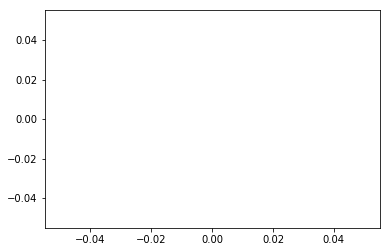

In [149]:
sns.distplot(app_data['residual'])

In [ ]:
plt.figure(figsize=(16, 10))
plt.grid()
sns.violinplot(x="Year", y="PCT_DIFF", hue="CLUSTER_APTA4", data=bus_data)

In [ ]:
plt.figure(figsize=(16, 10))
plt.grid()
sns.violinplot(x="Year", y="PCT_DIFF", hue="CLUSTER_APTA4", data=rail_data)

In [ ]:
plt.figure(figsize=(16, 10))
plt.grid()
sns.violinplot(x="Year", y="PCT_DIFF", hue="CLUSTER_APTA4", data=bus_data)

In [ ]:
plt.figure(figsize=(16, 12))
plt.grid()
sns.violinplot(x="Year", y="residual", hue="CLUSTER_APTA4", data=rail_data)

In [ ]:
plt.figure(figsize=(16, 12))
plt.grid()
sns.violinplot(x="Year", y="residual", hue="CLUSTER_APTA4", data=bus_data[bus_data['CLUSTER_APTA4']==3])

In [ ]:
plt.figure(figsize=(16, 12))
plt.grid()
sns.violinplot(x="Year", y="residual", hue="CLUSTER_APTA4", data=rail_data[rail_data['CLUSTER_APTA4']==1])

In [ ]:
plt.figure(figsize=(16, 12))
plt.grid()
sns.violinplot(x="CLUSTER_APTA", y="residual", hue="RAIL_FLAG", data=app_data)

In [ ]:
app_data['YEARS_SINCE_TNC'] =(app_data['YEARS_SINCE_TNC_BUS_NY'] 
                            + app_data['YEARS_SINCE_TNC_BUS_HI']
                            + app_data['YEARS_SINCE_TNC_BUS_MID']
                            + app_data['YEARS_SINCE_TNC_BUS_LOW']
                            + app_data['YEARS_SINCE_TNC_RAIL_NY']
                            + app_data['YEARS_SINCE_TNC_RAIL_HI']
                            + app_data['YEARS_SINCE_TNC_RAIL_MID']) 
                              

In [ ]:
sns.pairplot(app_data[app_data['RAIL_FLAG']==0], 
             x_vars='YEARS_SINCE_TNC', 
             y_vars='residual', 
             hue='CLUSTER_APTA4', 
             height=8)

In [ ]:
sns.pairplot(app_data[(app_data['RAIL_FLAG']==0) & (app_data['CLUSTER_APTA4']!=3)], 
             x_vars='YEARS_SINCE_TNC', 
             y_vars='residual', 
             hue='CLUSTER_APTA4', 
             height=8)

In [ ]:
sns.pairplot(app_data[app_data['RAIL_FLAG']==1], 
             x_vars='YEARS_SINCE_TNC', 
             y_vars='residual', 
             hue='CLUSTER_APTA4', 
             height=8)

In [ ]:
df2 = df.reset_index()

In [ ]:
plt.figure(figsize=(16, 10))
plt.grid()
sns.violinplot(x="Year", y="YEARS_SINCE_TNC", hue="CLUSTER_APTA4", data=df2)

In [ ]:
plt.figure(figsize=(16, 10))
plt.grid()
sns.violinplot(x="Year", y="TNC_TRIPS_PER_CAPITA_CLUSTER", hue="CLUSTER_APTA4", data=df2)

In [ ]:
plt.figure(figsize=(16, 10))
plt.grid()
sns.violinplot(x="Year", y="TNC_TRIPS_PER_UPT_2012", hue="CLUSTER_APTA4", data=df2)

In [ ]:
df2 = app_data[['RAIL_FLAG',
               'Unknown_FAC', 
               'VRM_ADJ_log', 
               'VRM_ADJ_ratio', 
               'FARE_per_UPT_cleaned_2018_ratio', 
               'POP_EMP_ratio', 
               'GAS_PRICE_2018_ratio',
               'TOTAL_MED_INC_INDIV_2018_ratio',
               'PCT_HH_NO_VEH_diff',
               'JTW_HOME_PCT_diff'
              ]]
sns.PairGrid(df2, hue="RAIL_FLAG")

In [ ]:
df2 = app_data[['RAIL_FLAG', 
               'Unknown_FAC', 
               'YEARS_SINCE_TNC_BUS_NY_diff', 
               'YEARS_SINCE_TNC_BUS_HI_diff', 
               'YEARS_SINCE_TNC_BUS_MID_diff', 
               'YEARS_SINCE_TNC_BUS_LOW_diff', 
               'YEARS_SINCE_TNC_RAIL_NY_diff',
               'YEARS_SINCE_TNC_RAIL_HI_diff',
               'YEARS_SINCE_TNC_RAIL_MID_diff'
              ]]
sns.PairGrid(df2, hue="RAIL_FLAG")